# General Investigation (non-ML)

### Complete Module List - For Paper

In [ ]:
# # General dependencies
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Model preprocessing and accuracy testing
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # Used in model testing, but not used in creating the final ensemble(s)
# from lazypredict.Supervised import LazyRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neural_network import MLPRegressor
# from sklearn.svm import LinearSVR, SVR
# from keras.models import Sequential
# from keras.layers import Dense

# # Used to create the models included in the final ensemble(s)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor
# from xgboost import XGBRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn import tree

# # Model saving
# import joblib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
forbes_df = pd.read_csv('Forbes Richest Athletes (Forbes Richest Athletes 1990-2020).csv', index_col=0)

In [3]:
forbes_df.loc[forbes_df['Gender'] == "Male",:][['Name','Year','Earnings ($ million)']].sort_values(by="Earnings ($ million)")

Name  Year  Earnings ($ million)
S.NO                                               
8        Michael Jordan  1990                   8.1
9         Arnold Palmer  1990                   8.1
10    Evander Holyfield  1990                   8.1
20    Sugar Ray Leonard  1991                   8.5
7           Greg Norman  1990                   8.5
...                 ...   ...                   ...
303        Lionel Messi  2021                 130.0
243      Manny Pacquiao  2015                 160.0
302      Conor McGregor  2021                 180.0
272    Floyd Mayweather  2018                 285.0
242    Floyd Mayweather  2015                 300.0

[310 rows x 3 columns]

In [4]:
# Add female data to the main dataset for feature creation (then remove it prior to train-test split)
female_df = pd.read_csv('Forbes Top 10 Female Athletes 2021.csv', index_col=0)
forbes_df = forbes_df.append(female_df)

In [5]:
forbes_df.columns.to_list()

['Name',
 'Gender',
 'Year of Birth',
 'Age',
 'Nationality',
 'Sport',
 'Year',
 'Year Went Pro',
 'Years Pro',
 'Went Pro Age',
 'Olympian',
 'Earned College Degree',
 'Earnings ($ million)']

In [6]:
earnings_split_df = pd.read_csv("Forbes Earnings Split.csv", index_col=0)

In [7]:
earnings_split_df['Salary to Total Percent'] = earnings_split_df['Salary']/earnings_split_df['Total']*100

In [8]:
salary_percentage = earnings_split_df.groupby('Gender')['Salary to Total Percent'].mean()

In [9]:
index = salary_percentage.keys()
values = salary_percentage.values

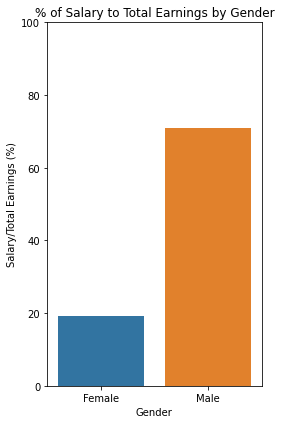

In [10]:
plt.figure(figsize=(4,6), tight_layout=True)
sns.barplot(index, values)
plt.title('% of Salary to Total Earnings by Gender')
plt.ylabel('Salary/Total Earnings (%)')
plt.ylim(0,100)
plt.savefig('salary_total_percent.png')
plt.show()

# Predicting Earnings

## Correlation Heatmap

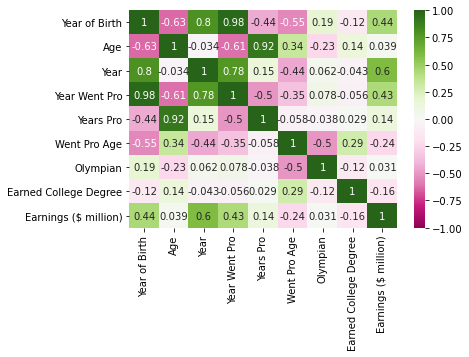

In [11]:
sns.heatmap(forbes_df.corr(), cmap="PiYG", vmin=-1, vmax=1, annot=True)
plt.show()

In [12]:
forbes_dummies_df = pd.get_dummies(forbes_df, columns=["Nationality","Sport"])

In [13]:
# Remove female data from dataframe -- will be used in testing in Analysis.ipynb
forbes_dummies_df = forbes_dummies_df[:-10]

In [14]:
forbes_dummies_df.columns.to_list()

['Name',
 'Gender',
 'Year of Birth',
 'Age',
 'Year',
 'Year Went Pro',
 'Years Pro',
 'Went Pro Age',
 'Olympian',
 'Earned College Degree',
 'Earnings ($ million)',
 'Nationality_Argentina',
 'Nationality_Australia',
 'Nationality_Austria',
 'Nationality_Brazil',
 'Nationality_Canada',
 'Nationality_Finland',
 'Nationality_France',
 'Nationality_Germany',
 'Nationality_India',
 'Nationality_Ireland',
 'Nationality_Italy',
 'Nationality_Japan',
 'Nationality_Mexico',
 'Nationality_Philippines',
 'Nationality_Portugal',
 'Nationality_Russia',
 'Nationality_Serbia',
 'Nationality_South Korea',
 'Nationality_Spain',
 'Nationality_Switzerland',
 'Nationality_UK',
 'Nationality_USA',
 'Sport_American Football',
 'Sport_American Football / Baseball',
 'Sport_Auto Racing',
 'Sport_Badminton',
 'Sport_Baseball',
 'Sport_Basketball',
 'Sport_Boxing',
 'Sport_Cycling',
 'Sport_F1 Racing',
 'Sport_Golf',
 'Sport_Gymnastics',
 'Sport_Ice Hockey',
 'Sport_MMA',
 'Sport_Motorcycle Racing',
 'Sport

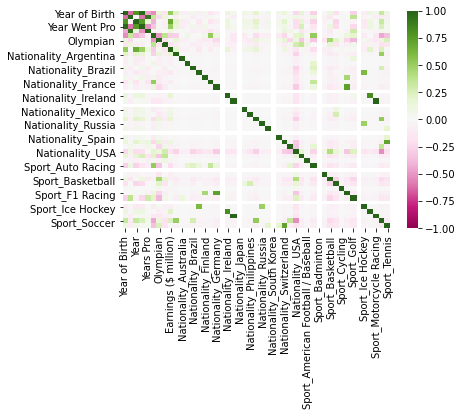

In [15]:
sns.heatmap(forbes_dummies_df.corr(), cmap="PiYG", vmin=-1, vmax=1)
plt.show()

## Train Test Split

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
X = forbes_dummies_df.drop(columns=['Name','Earnings ($ million)','Gender'])
y = forbes_dummies_df['Earnings ($ million)']

In [18]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
X_std_scaled = std_scaler.fit(X,y).transform(X)
X_mm_scaled = mm_scaler.fit(X,y).transform(X)

In [19]:
X_train_std, X_test_std, _, _ = train_test_split(X_std_scaled, y, random_state=42)
X_train_mm, X_test_mm, _, _ = train_test_split(X_mm_scaled, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
X_train.shape

(233, 46)

## Linear Regression

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

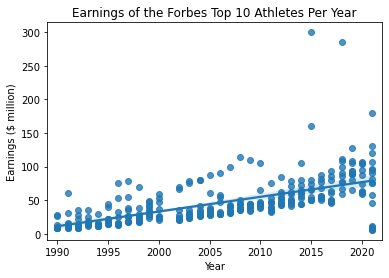

In [22]:
years = forbes_df['Year']
earnings = forbes_df['Earnings ($ million)']
plt.title("Earnings of the Forbes Top 10 Athletes Per Year")
plt.xlabel("Year")
plt.xlim(1989, 2022)
plt.ylabel("Earnings ($ million)")
sns.regplot(years, earnings)
plt.show()

A huge factor that may cause this steady increase over time is inflation. Potential other factors may include the increased social aspect of players. The internet brought with it the ability to connect with fans easier and thus opened the door for marketing companies to use athletes for more promotions which must be compensated.

#### Standard Scale

In [23]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_train_std, y_train)

0.5472839080143908

In [24]:
lr.score(X_test_std, y_test)

-9.78007196651288e+26

#### MinMax Scale

In [25]:
lr.fit(X_train_mm, y_train)
lr.score(X_train_mm, y_train)

0.5720566305642274

In [26]:
lr.score(X_test_mm, y_test)

-3.497353171493343e+21

#### Unscaled

In [27]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5479970643441041

In [28]:
lr.score(X_test, y_test)

-69621375691763.875

Horribly inaccurate which is expected based on the lack of correlation between features (besides year).

## Decision Tree

In [29]:
from sklearn import tree

In [30]:
def get_dt_score(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1):
    dt = tree.DecisionTreeRegressor(
        random_state=42,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    dt.fit(X_train, y_train)
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    print(f'Criterion: {criterion}')
    print(f'Max Depth: {max_depth}')
    print(f'Min Samples Split: {min_samples_split}')
    print(f'Min Samples Leaf: {min_samples_leaf}')
    print(f'Train Score: {train_score}')
    print(f'Test Score: {test_score}')
    print('='*20)
    return train_score, test_score

### Defaults

In [31]:
get_dt_score()

Criterion: mse
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725


(1.0, 0.8070919684894725)

### Attempt #2 (Different Criterions)

In [32]:
get_dt_score(criterion='friedman_mse')

Criterion: friedman_mse
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659


(1.0, 0.8304598942053659)

In [33]:
get_dt_score(criterion='mae')

Criterion: mae
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: -0.30220753104211195


(1.0, -0.30220753104211195)

In [34]:
# Keep testing mse and friedman_mse
criterions = ['mse', 'friedman_mse']

### Attempt #3 (Max Depths)

In [35]:
depth_results = []
for c in criterions:
    for d in range(1,100):
        scores = get_dt_score(c, d)
        result = {
            'mse': c,
            'max_depth': d,
            'train_score': scores[0],
            'test_score': scores[1]
        }
        depth_results.append(result)

Criterion: mse
Max Depth: 1
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.3538360834418661
Test Score: 0.4529164840396541
Criterion: mse
Max Depth: 2
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.5913358904526743
Test Score: 0.6147412420272985
Criterion: mse
Max Depth: 3
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.7981895725102777
Test Score: 0.6587269162970363
Criterion: mse
Max Depth: 4
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.8632050417978663
Test Score: 0.7438399034033383
Criterion: mse
Max Depth: 5
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.9101382201288695
Test Score: 0.7146275630909238
Criterion: mse
Max Depth: 6
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.9430384986071862
Test Score: 0.8044455783611524
Criterion: mse
Max Depth: 7
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.9682930068755546
Test Score: 0.7875347784692533
Criterion: mse
Max Depth: 8
Min Samples Split: 2
Min Samples Leaf: 1
Train S

Criterion: mse
Max Depth: 60
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 61
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 62
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 63
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 64
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 65
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 66
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 67
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8070919684894725
Criterion: mse
Max Depth: 68
Min Samples Split: 2
Min Sa

Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 19
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 20
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 21
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 22
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 23
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 24
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 25
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 26
Min Samples Split: 2
Min Samples Leaf: 1
T

Criterion: friedman_mse
Max Depth: 82
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 83
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 84
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 85
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 86
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 87
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 88
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8304598942053659
Criterion: friedman_mse
Max Depth: 89
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 1.0
Test Score: 0.8

In [36]:
def get_best_scores(results):
    best_train = {'train_score':0}
    best_test = {'test_score':0}
    for r in results:
        if r['train_score'] > best_train['train_score']:
            best_train = r
        if r['test_score'] > best_test['test_score']:
            best_test = r
    print('Best Train:')
    print(best_train)
    print('Best Test:')
    print(best_test)
    return best_train, best_test

In [37]:
get_best_scores(depth_results)

Best Train:
{'mse': 'mse', 'max_depth': 17, 'train_score': 1.0, 'test_score': 0.8070919684894725}
Best Test:
{'mse': 'friedman_mse', 'max_depth': 17, 'train_score': 1.0, 'test_score': 0.8304598942053659}


({'mse': 'mse',
  'max_depth': 17,
  'train_score': 1.0,
  'test_score': 0.8070919684894725},
 {'mse': 'friedman_mse',
  'max_depth': 17,
  'train_score': 1.0,
  'test_score': 0.8304598942053659})

Considering the rounding error with the friedman_mse (max_depth of 16) model's train_score, I consider it to be the best of the given parameters and will be used going forward

### Attempt #4 (Minimum Sample Split and Leaf)

In [38]:
##
# This takes a few minutes to run
##
sample_results = []
for s in range(2,100):
    for l in range(1,100):
        scores = get_dt_score(criterion="friedman_mse", max_depth=16, min_samples_split=s, min_samples_leaf=l)
        result = {
            'min_split': s,
            'min_leaf': l,
            'train_score': scores[0],
            'test_score': scores[1]
        }
        sample_results.append(result)

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 1
Train Score: 0.9999978662884621
Test Score: 0.809500136768897
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 2
Train Score: 0.9689559000383933
Test Score: 0.799835163376535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 3
Train Score: 0.8334360644788271
Test Score: 0.8112778980021323
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 4
Train Score: 0.8126203461276658
Test Score: 0.8069253445582936
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 5
Train Score: 0.7276696840099179
Test Score: 0.485488383743388
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 6
Train Score: 0.694628256381081
Test Score: 0.6247278262693323
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 7
Train Score: 0.6822647607822272
Test Score: 0.5968848464382686
Criterion:

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 2
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.544353664

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 13
Train Score: 0.5759122836092936
Test Score: 0.5641347886344075
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 14
Train Score: 0.5760958621423757
Test Score: 0.5501214260687021
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 15
Train Score: 0.5752111056794431
Test Score: 0.5491445396761268
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 16
Train Score: 0.567482893964659
Test Score: 0.5472871854507084
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 17
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146


Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 3
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.4534851005

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 27
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 28
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Crit

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 4
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.363365

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
C

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 5
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.363

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 6
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.285

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.55230467023634

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 7
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 1
Train Score: 0.8460447014418725
Test Score: 0.8375660751838456
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 2
Train Score: 0.838425140954906
Test Score: 0.8404472968893345
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 3
Train Score: 0.826411219692112
Test Score: 0.7990090761294603
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 4
Train Score: 0.8126203461276658
Test Score: 0.8069253445582936
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 5
Train Score: 0.7276696840099179
Test Score: 0.485488383743388
Cri

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 8
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.54435366482

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 5
Train Score: 0.7276696840099179
Test Score: 0.485488383743388
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 6
Train Score: 0.694628256381081
Test Score: 0.6247278262693323
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 7
Train Score: 0.6822647607822272
Test Score: 0.5968848464382686
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 8
Train Score: 0.6786904534028944
Test Score: 0.606738458803797
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 9
Train Score: 0.6676958314660961
Test Score: 0.6527395311722783
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 10
Train Score: 0.6433447060665338
Test Score: 0.6518007613300147
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 11
Train Score: 0.6075414307401604
Test Score: 0.7108361501069166
Criteri

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 9
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 14
Train Score: 0.5760958621423757
Test Score: 0.5501214260687021
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 15
Train Score: 0.5752111056794431
Test Score: 0.5491445396761268
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 16
Train Score: 0.567482893964659
Test Score: 0.5472871854507084
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 17
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 10
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.50

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 21
Train Score: 0.5280793968464399
Test Score: 0.5794644085313532
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 22
Train Score: 0.5216433659103545
Test Score: 0.5616565852976895
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 23
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 24
Train Score: 0.5168585652411408
Test Score: 0.5599294208

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 11
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.4534851

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 28
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.530820027927030

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 12
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score

Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples 

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 13
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 1
Train Score: 0.8003345341994289
Test Score: 0.706340769975571
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 2
Train Score: 0.79859979415654
Test Score: 0.7531

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 14
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 1
Train Score: 0.7950059908855133
Test Score: 0.750954738417741
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 2
Train Score: 0.7932712508426245
Test Score: 0.7513765435317415
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 3
Train Score: 0.7808187180611985
Test Score: 0.7448486848907043
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 4
Train Score: 0.7803537291794588
Test Score: 0.73823896

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 15
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 21
Train Score: 0.5280793968464399
Test Score: 0.5794644085313532
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 22
Train Score: 0.5216433659103545
Test Score: 0.5616565852976895
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 23
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 24
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 25
Train Score: 0.49949612823611533
Test Score: 0.5370036153779713
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 26
Train Score: 0.49755958149604773
Test Score: 0.527062095

Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 16

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 17
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 4
Train Score: 0.775698244118834
Test Score: 0.7528534826916313
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 5
Train Score: 0.7048156465125852
Test Score: 0.42269532984222047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 6
Train Score: 0.6787700761831674
Test Score: 0.6005553899741954
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 7
Train Score: 0.6782175343239475
Test Score: 0.6006778379454458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 8
Train Score: 0.6774102264801338
Test Score: 0.5992271233826809
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 9
Train Score: 0.6676958314660961
Test Score: 0.6527395311722783
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 10
Train Score: 0.6433447060665338
Test Score: 0.651800761330014

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 18
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.50

Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 27
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 28
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 33
Train Score: 0.44908800187791

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 19
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 20
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.544353

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 7
Train Score: 0.6651832338383499
Test Score: 0.5921588106317812
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 8
Train Score: 0.6651832338383499
Test Score: 0.5921588106317812
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 9
Train Score: 0.6573854658655134
Test Score: 0.643372239845243
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 10
Train Score: 0.633696807157322
Test Score: 0.6416525000311649
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 11
Train Score: 0.6075414307401604
Test Score: 0.7108361501069166
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 12
Train Score: 0.6075414307401604
Test Score: 0.7108361501069166
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 13
Train Score: 0.5759122836092936
Test Score: 0.56413478863440

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 21
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.51

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 22
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 23
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 5
Train Score: 0.6618325443377493
Test Score: 0.42816460337794293
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 6
Train Score: 0.6453751041267636
Test Score: 0.5944626344859876
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 7
Train Score: 0.6453751041267636
Test Score: 0.5944626344859876
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 8
Train Score: 0.6453751041267636
Test Score: 0.5944626344859876
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 9
Train Score: 0.6188190993701341
Test Score: 0.6397894899118034
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 10
Train Score: 0.6188190993701341
Test Score: 0.6397894899118034
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 11
Train Score: 0.6075414307401604
Test Score: 0.7108361501069

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 24
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 14
Train Score: 0.5760958621423757
Test Score: 0.5501214260687021
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 15
Train Score: 0.5752111056794431
Test Score: 0.5491445396761268
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 16
Train Score: 0.567482893964659
Test Score: 0.5472871854507084
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 17
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 25
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.50

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 21
Train Score: 0.5280793968464399
Test Score: 0.5794644085313532
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 22
Train Score: 0.5216433659103545
Test Score: 0.5616565852976895
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 23
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 24
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 25
Train Score: 0.49949612823611533
Test Score: 0.5370036153779713
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 26
Train Score: 0.49755958149604773
Test Score: 0.527062095

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 26
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 27
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 1
Train Score: 0.7550936625444111
Test Score: 0.7616621509246786
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 2
Train Score: 0.7550936625444111
Test Score: 0.7616621509246786
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 3
Train Score: 0.7510121848365277
Test Score: 0.7633

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 28
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 17
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 21
Train Score: 0.5280793968464399
Test Score: 0.5794644085313532
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 22
Train Score: 0.5216433659103545
Test Score: 0.5616565852976895
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 23
Train Score: 0.5168585652411408
Test Score: 0.559929420

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 29
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.3633656054

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.53726100007

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 30
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 31
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.54

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 14
Train Score: 0.5678123037325038
Test Score: 0.5492233406218889
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 15
Train Score: 0.5678123037325038
Test Score: 0.5492233406218889
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 16
Train Score: 0.567482893964659
Test Score: 0.5472871854507084
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 17
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 32
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.363365605

Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 45
Train Score: 0.444864919

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 33
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 1
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 2
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 3
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 4
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 5
Train Score: 0.6543433583963129
Test Score: 0.5424313129502415
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 6
Train Score: 0.6378859181853271
Test Score: 0.5799699999917

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 34
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.54

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 14
Train Score: 0.5678123037325038
Test Score: 0.5492233406218889
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 15
Train Score: 0.5678123037325038
Test Score: 0.5492233406218889
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 16
Train Score: 0.567482893964659
Test Score: 0.5472871854507084
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 17
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 18
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 19
Train Score: 0.5674396220217577
Test Score: 0.5481120338368146
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 20
Train Score: 0.5674396220217577
Test Score: 0.5481120338

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 35
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 36
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.537261000

Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 4
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 5
Train Score: 0.6543433583963129
Test Score: 0.5424313129502415
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 6
Train Score: 0.5967157331696025
Test Score: 0.5680198403469454
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 7
Train Score: 0.5967157331696025
Test Score: 0.5680198403469454
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 8
Train Score: 0.5967157331696025
Test Score: 0.5680198403469454
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 9
Train Score: 0.5796096612687713
Test Score: 0.5895219116333832
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 1

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 37
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 26
Train Score: 0.49755958149604773
Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 27
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 28
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 38
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 39
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 1
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 2
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 3
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 4
Train Score: 0.7122559206039829
Test Score: 0.7266007939793053
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 5
Train Score: 0.6181849840504249
Test Score: 0.5097160989130669
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 6
Train Score: 0.5967157331696025
Test Score: 0.5680198403469

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 40
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.544

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 9
Train Score: 0.5796096612687713
Test Score: 0.5895219116333832
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 10
Train Score: 0.5796096612687713
Test Score: 0.5895219116333832
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 11
Train Score: 0.5678591365413734
Test Score: 0.5868817281464307
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 12
Train Score: 0.5678591365413734
Test Score: 0.5868817281464307
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 13
Train Score: 0.5667529183209588
Test Score: 0.5600145824828657
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 14
Train Score: 0.5678123037325038
Test Score: 0.5492233406218889
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 15
Train Score: 0.5678123037325038
Test Score: 0.5492233406

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 41
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 26
Train Score: 0.49755958149604773
Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 27
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 28
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 42
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score

Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 43
Min Samp

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 11
Train Score: 0.530962810097728
Test Score: 0.5492265415098615
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 12
Train Score: 0.530962810097728
Test Score: 0.5492265415098615
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 13
Train Score: 0.530962810097728
Test Score: 0.5492265415098615
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 14
Train Score: 0.532022195509273
Test Score: 0.5384352996488848
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 15
Train Score: 0.532022195509273
Test Score: 0.5384352996488848
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 16
Train Score: 0.5316927857414282
Test Score: 0.5364991444777043
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 17
Train Score: 0.531649513798527
Test Score: 0.537323992863810

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 44
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.45348

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.53726100007

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 45
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 46
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 8
Train Score: 0.5385446789103412
Test Score: 0.5393616930451663
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 9
Train Score: 0.5385446789103412
Test Score: 0.5393616930451663
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 10
Train Score: 0.5385446789103412
Test Score: 0.5393616930451663
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 11
Train Score: 0.530962810097728
Test Score: 0.5492265415098615
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 12
Train Score: 0.530962810097728
Test Score: 0.5492265415098615
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 13
Train Score: 0.530962810097728
Test Score: 0.5492265415098615
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 14
Train Score: 0.5285047631485238
Test Score: 0.53040894781812

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 47
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.50

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 19
Train Score: 0.5285047631485238
Test Score: 0.5304089478181206
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 20
Train Score: 0.5285047631485238
Test Score: 0.5304089478181206
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 21
Train Score: 0.5249346461964366
Test Score: 0.5725493634856633
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 22
Train Score: 0.5174290560064769
Test Score: 0.5571357408350949
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 23
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 24
Train Score: 0.5168585652411408
Test Score: 0.559929420813303
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 25
Train Score: 0.49949612823611533
Test Score: 0.5370036153

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 48
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.53726100007596

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 49
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 50
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 1
Train Score: 0.7080872646891982
Test Score: 0.7140957620276578
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 2
Train Score: 0.7080872646891982
Test Score: 0.7

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 51
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.544353

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 4
Train Score: 0.7034841827789954
Test Score: 0.7079304207107426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 5
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 6
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 7
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 8
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 9
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 10
Train Score: 0.5339415970001383
Test Score: 0.533196351728251

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 52
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 25
Train Score: 0.49755958149604773
Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 26
Train Score: 0.49755958149604773
Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 27
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 28
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.51673240113

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 53
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 54
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 6
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 7
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 8
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 9
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 10
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 11
Train Score: 0.5226008646317107
Test Score: 0.5311107023122117
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 12
Train Score: 0.5226008646317107
Test Score: 0.5311107023122

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 55
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.51

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 56
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 57
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score

Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 58
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 1
Train Score: 0.7034841827789954
Test Score: 0.7079304207107426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 2
Train Score: 0.7034841827789954
Test Score: 0.7079304207107426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 3
Train Score: 0.7034841827789954
Test Score: 0.7079304207107426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 4
Train Score: 0.7034841827789954
Test Score: 0.7079304

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 59
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 7
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 8
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 9
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 10
Train Score: 0.5339415970001383
Test Score: 0.5331963517282514
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 11
Train Score: 0.5226008646317107
Test Score: 0.5311107023122117
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 12
Train Score: 0.5226008646317107
Test Score: 0.5311107023122117
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 13
Train Score: 0.5226008646317107
Test Score: 0.531110702312

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 60
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 18
Train Score: 0.5239016812383209
Test Score: 0.5242436065012055
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 19
Train Score: 0.5239016812383209
Test Score: 0.5242436065012055
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 20
Train Score: 0.5239016812383209
Test Score: 0.5242436065012055
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 21
Train Score: 0.5210745782382359
Test Score: 0.5637053470771005
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 22
Train Score: 0.49755958149604773
Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 23
Train Score: 0.49755958149604773
Test Score: 0.5270620958897745
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 24
Train Score: 0.49755958149604773
Test Score: 0.527062

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 61
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 29
Train Score: 0.495765098653304
Test Score: 0.5154968192951443
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 30
Train Score: 0.4952956623433574
Test Score: 0.5270535269919041
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.53726100007596

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 62
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 31
Train Score: 0.492670001528142
Test Score: 0.516732401139535
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 33
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 34
Train Score: 0.44836357162271
Test Score: 0.5308200279270301
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 63
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 64
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 65
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 66
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 1
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 2
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 3
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 4
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 5
Train Score: 0.4875324943498217
Test Score: 0.5875226661

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 67
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 6
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 7
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 8
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 9
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 10
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 11
Train Score: 0.47619176198139423
Test Score: 0.5854370166927214
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 12
Train Score: 0.47619176198139423
Test Score: 0.58543701669

Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 68
Min Samples Leaf: 63
Train Score: 0.420

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 15
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 16
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 17
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 18
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 19
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 20
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 21
Train Score: 0.4774925785880041
Test Score: 0.578569920

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 69
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.51

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 26
Train Score: 0.45397758184581594
Test Score: 0.5419266696943892
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 27
Train Score: 0.4521830990030723
Test Score: 0.5303613930997592
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 28
Train Score: 0.4521830990030723
Test Score: 0.5303613930997592
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 29
Train Score: 0.4521830990030723
Test Score: 0.5303613930997592
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 30
Train Score: 0.45171366269312585
Test Score: 0.5419181007965189
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 31
Train Score: 0.4490880018779101
Test Score: 0.5315969749441499
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 32
Train Score: 0.4490880018779101
Test Score: 0.5315969

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 70
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 71
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 1
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 2
Train Score: 0.4875324943498217
Test Score: 0.5

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 72
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 1
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 2
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 3
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 4
Train Score: 0.4875324943498217
Test Score: 0.5875226661087611
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 5
Train Score: 0.4875324943498217
Test Score: 0.5875226661

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 73
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.54

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 13
Train Score: 0.47619176198139423
Test Score: 0.5854370166927214
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 14
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 15
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 16
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 17
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 18
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 19
Train Score: 0.4774925785880041
Test Score: 0.57856992

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 74
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.51

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 19
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 20
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 21
Train Score: 0.4774925785880041
Test Score: 0.5785699208817152
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 22
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 23
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 24
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 25
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 75
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.48

Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 27
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 28
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 29
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 30
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 31
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 32
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 33
Train Score: 0.444864919

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 76
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 77
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score

Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 78
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 1
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 2
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 3
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 4
Train Score: 0.48258112575922363
Test Score: 0.587625

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 79
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 6
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 7
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 8
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 9
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 10
Train Score: 0.48258112575922363
Test Score: 0.587625720591946
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 11
Train Score: 0.47619176198139423
Test Score: 0.5854370166927214
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 12
Train Score: 0.47619176198139423
Test Score: 0.58543701669

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 80
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 12
Train Score: 0.47619176198139423
Test Score: 0.5854370166927214
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 13
Train Score: 0.47619176198139423
Test Score: 0.5854370166927214
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 14
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 15
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 16
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 17
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 18
Train Score: 0.46930416078346526
Test Score: 0.58

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 81
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 18
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 19
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 20
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 21
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 22
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 23
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 24
Train Score: 0.4448649192540569
Test Score: 0.53726

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 82
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 32
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 33
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 34
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 83
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 87
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 88
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 89
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 84
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 85
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 1
Train Score: 0.4698935945350392
Test Score: 

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 86
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 1
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 2
Train Score: 0.4698935945350392
Test Score: 0.5

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 87
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 5
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 6
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 7
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 8
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 9
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 10
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 11
Train Score: 0.4698935945350392
Test Score: 0.58667543747565

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 88
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.54

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 11
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 12
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 13
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 14
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 15
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 16
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 17
Train Score: 0.46930416078346526
Test Score: 0.58855

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 66
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 89
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 16
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 17
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 18
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 19
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 20
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 21
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 22
Train Score: 0.4448649192540569
Test Score: 0.537

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 90
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.48

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 22
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 23
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 24
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 25
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 26
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 27
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 28
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 80
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 81
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 82
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 83
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 84
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 85
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 91
Min Samples Leaf: 86
Train Score: 0.32445067620214896
Test Score: 0

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 40
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 41
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 42
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 43
Train Score: 0.4448649192540569
Test Score: 0.537261000

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 92
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score

Min Samples Split: 93
Min Samples Leaf: 44
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 45
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 46
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 47
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 48
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 49
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 50
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max D

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 96
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 97
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 98
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 93
Min Samples Leaf: 99
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 1
Train Score: 0.4698935945350392
Test Score: 

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 51
Train Score: 0.44145081128688624
Test Score: 0.5239444803710758
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 52
Train Score: 0.4293300400641309
Test Score: 0.5556882645677013
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 53
Train Score: 0.4218213529579221
Test Score: 0.5523046702363426
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 54
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 55
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 94
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 3
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 4
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 5
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 6
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 7
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 8
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 9
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 56
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 57
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 58
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 95
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.54

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 9
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 10
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 11
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 12
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 13
Train Score: 0.4698935945350392
Test Score: 0.5866754374756534
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 14
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 15
Train Score: 0.46930416078346526
Test Score: 0.58855822

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 59
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 60
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 61
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 62
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 63
Train Score: 0.42063044118720416
Test Score: 0.5443536648259453
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 64
Train Score: 0.4088590837238333
Test Score: 0.5090417194186361
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 96
Min Samples Leaf: 65
Train Score: 0.4080718145786385
Test Score: 0.4897

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 14
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 15
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 16
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 17
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 18
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 19
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 20
Train Score: 0.46930416078346526
Test Score: 0.58

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 67
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 68
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 69
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 70
Train Score: 0.4080718145786385
Test Score: 0.48976738768032957
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 71
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 72
Train Score: 0.38902981830408967
Test Score: 0.5098744715136458
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 97
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.51

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 20
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 21
Train Score: 0.46930416078346526
Test Score: 0.5885582221635337
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 22
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 23
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 24
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 25
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 26
Train Score: 0.4448649192540569
Test Score: 0.5372610

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 73
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 74
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 75
Train Score: 0.38747426372281146
Test Score: 0.5126826035050045
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 76
Train Score: 0.34895994382578355
Test Score: 0.4825987736207509
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 77
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 78
Train Score: 0.3387678525273491
Test Score: 0.453485100554047
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 98
Min Samples Leaf: 79
Train Score: 0.3387678525273491
Test Score: 0.4534851

Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 33
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 34
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 35
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 36
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 37
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 38
Train Score: 0.4448649192540569
Test Score: 0.5372610000759679
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 39
Train Score: 0.4448649192540569
Test Score: 0.537261000

Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 90
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 91
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 92
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 93
Train Score: 0.32445067620214896
Test Score: 0.36336560547433516
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 94
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99
Min Samples Leaf: 95
Train Score: 0.31659849454134503
Test Score: 0.28594527861718755
Criterion: friedman_mse
Max Depth: 16
Min Samples Split: 99

In [39]:
get_best_scores(sample_results)

Best Train:
{'min_split': 2, 'min_leaf': 1, 'train_score': 0.9999978662884621, 'test_score': 0.809500136768897}
Best Test:
{'min_split': 5, 'min_leaf': 1, 'train_score': 0.8574850616112539, 'test_score': 0.847893325377662}


({'min_split': 2,
  'min_leaf': 1,
  'train_score': 0.9999978662884621,
  'test_score': 0.809500136768897},
 {'min_split': 5,
  'min_leaf': 1,
  'train_score': 0.8574850616112539,
  'test_score': 0.847893325377662})

It is not worth it to sacrifice the ~14% accuracy on the training data for the 1.4% gain on the testing data so we will keep the defaults (min_sample_split = 2, min_sample_leaf = 1)

In [40]:
# save best model at this point
best_dt_model = tree.DecisionTreeRegressor(random_state=42, criterion="friedman_mse", max_depth=16).fit(X_train, y_train)

In [41]:
best_dt_model.score(X_train, y_train)

0.9999978662884621

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
def get_rf_score(max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=True, oob_score=False, warm_start=False):
    rf = RandomForestRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        oob_score=oob_score,
        warm_start=warm_start,
        random_state=42
        )
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    y_predict = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    print(f'Min Samples Split: {min_samples_split}')
    print(f'Min Samples Leaf: {min_samples_leaf}')
    print(f'score: {score}')
    print(f'mse: {mse}')
    print('='*20)
    return score,mse

In [44]:
def get_best_rf_score(results):
    best_mse = {'mse': 1000000}
    best_score = {'score': 0}
    for r in results:
        if r['mse'] < best_mse['mse']:
            best_mse = r
        if r['score'] > best_score['score']:
            best_score = r
    print('Best score:')
    print(best_score)
    print('Best mse:')
    print(best_mse)
    return best_score, best_mse

### Defaults

In [45]:
get_rf_score()

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282


(0.8913521683945804, 89.63827482051282)

### Attempt #2 (Max Depth)

In [46]:
depth_results = []
for md in range(5,100):
    result = {}
    score,mse = get_rf_score(max_depth=md)
    result['max_depth'] = md
    result['score'] = score
    result['mse'] = mse
    depth_results.append(result)

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8672051722387475
mse: 109.56039425467971
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8698513617197692
mse: 107.37719504654065
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8768331344705393
mse: 101.61698745362003
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8894942741568828
mse: 91.17110278224351
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8915491013174839
mse: 89.4757982463964
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8941010538712084
mse: 87.37034781117333
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8895360786806664
mse: 91.13661258270349
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8919422583610688
mse: 89.15142988487698
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8904168549463005
mse: 90.40994124662909
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8926638204158492
mse: 88.55611586147928
Min Samp

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8913521683945804
mse: 89.63827482051282
Min Sample

In [47]:
get_best_rf_score(depth_results)

Best score:
{'max_depth': 11, 'score': 0.8957369836905309, 'mse': 86.02064828597656}
Best mse:
{'max_depth': 11, 'score': 0.8957369836905309, 'mse': 86.02064828597656}


({'max_depth': 11, 'score': 0.8957369836905309, 'mse': 86.02064828597656},
 {'max_depth': 11, 'score': 0.8957369836905309, 'mse': 86.02064828597656})

In [48]:
# save best depth
best_depth = 11

### Attempt #3 (Min Sample Split and Leaf)

In [49]:
##
# This takes a few minutes to run
##
min_samples_results = []
for s in range(2,25):
    for l in range(1,25):
        result = {}
        score,mse = get_rf_score(max_depth=best_depth, min_samples_split=s, min_samples_leaf=l)
        result['min_samples_split'] = s
        result['min_samples_leaf'] = l
        result['score'] = score
        result['mse'] = mse
        min_samples_results.append(result)

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656
Min Samples Split: 2
Min Samples Leaf: 2
score: 0.8694280110904871
mse: 107.72647417611265
Min Samples Split: 2
Min Samples Leaf: 3
score: 0.8308650556194312
mse: 139.54226607299648
Min Samples Split: 2
Min Samples Leaf: 4
score: 0.7835280979093755
mse: 178.5969178012626
Min Samples Split: 2
Min Samples Leaf: 5
score: 0.713150751869857
mse: 236.66069866289567
Min Samples Split: 2
Min Samples Leaf: 6
score: 0.7083818172972365
mse: 240.59523708400374
Min Samples Split: 2
Min Samples Leaf: 7
score: 0.7118626745645266
mse: 237.72340765376256
Min Samples Split: 2
Min Samples Leaf: 8
score: 0.7078900736918728
mse: 241.00094281956683
Min Samples Split: 2
Min Samples Leaf: 9
score: 0.6960022914180315
mse: 250.8087804793095
Min Samples Split: 2
Min Samples Leaf: 10
score: 0.6883880889444658
mse: 257.09076479302564
Min Samples Split: 2
Min Samples Leaf: 11
score: 0.6815474945415225
mse: 262.7344952933599
Mi

Min Samples Split: 5
Min Samples Leaf: 3
score: 0.8308650556194312
mse: 139.54226607299648
Min Samples Split: 5
Min Samples Leaf: 4
score: 0.7835280979093755
mse: 178.5969178012626
Min Samples Split: 5
Min Samples Leaf: 5
score: 0.713150751869857
mse: 236.66069866289567
Min Samples Split: 5
Min Samples Leaf: 6
score: 0.7083818172972365
mse: 240.59523708400374
Min Samples Split: 5
Min Samples Leaf: 7
score: 0.7118626745645266
mse: 237.72340765376256
Min Samples Split: 5
Min Samples Leaf: 8
score: 0.7078900736918728
mse: 241.00094281956683
Min Samples Split: 5
Min Samples Leaf: 9
score: 0.6960022914180315
mse: 250.8087804793095
Min Samples Split: 5
Min Samples Leaf: 10
score: 0.6883880889444658
mse: 257.09076479302564
Min Samples Split: 5
Min Samples Leaf: 11
score: 0.6815474945415225
mse: 262.7344952933599
Min Samples Split: 5
Min Samples Leaf: 12
score: 0.6734927404931645
mse: 269.37995012047986
Min Samples Split: 5
Min Samples Leaf: 13
score: 0.667280649650621
mse: 274.50514312181105


Min Samples Split: 8
Min Samples Leaf: 5
score: 0.713150751869857
mse: 236.66069866289567
Min Samples Split: 8
Min Samples Leaf: 6
score: 0.7083818172972365
mse: 240.59523708400374
Min Samples Split: 8
Min Samples Leaf: 7
score: 0.7118626745645266
mse: 237.72340765376256
Min Samples Split: 8
Min Samples Leaf: 8
score: 0.7078900736918728
mse: 241.00094281956683
Min Samples Split: 8
Min Samples Leaf: 9
score: 0.6960022914180315
mse: 250.8087804793095
Min Samples Split: 8
Min Samples Leaf: 10
score: 0.6883880889444658
mse: 257.09076479302564
Min Samples Split: 8
Min Samples Leaf: 11
score: 0.6815474945415225
mse: 262.7344952933599
Min Samples Split: 8
Min Samples Leaf: 12
score: 0.6734927404931645
mse: 269.37995012047986
Min Samples Split: 8
Min Samples Leaf: 13
score: 0.667280649650621
mse: 274.50514312181105
Min Samples Split: 8
Min Samples Leaf: 14
score: 0.6588893784401625
mse: 281.42823642005794
Min Samples Split: 8
Min Samples Leaf: 15
score: 0.6516222087320573
mse: 287.423906520757

Min Samples Split: 11
Min Samples Leaf: 7
score: 0.7118626745645266
mse: 237.72340765376256
Min Samples Split: 11
Min Samples Leaf: 8
score: 0.7078900736918728
mse: 241.00094281956683
Min Samples Split: 11
Min Samples Leaf: 9
score: 0.6960022914180315
mse: 250.8087804793095
Min Samples Split: 11
Min Samples Leaf: 10
score: 0.6883880889444658
mse: 257.09076479302564
Min Samples Split: 11
Min Samples Leaf: 11
score: 0.6815474945415225
mse: 262.7344952933599
Min Samples Split: 11
Min Samples Leaf: 12
score: 0.6734927404931645
mse: 269.37995012047986
Min Samples Split: 11
Min Samples Leaf: 13
score: 0.667280649650621
mse: 274.50514312181105
Min Samples Split: 11
Min Samples Leaf: 14
score: 0.6588893784401625
mse: 281.42823642005794
Min Samples Split: 11
Min Samples Leaf: 15
score: 0.6516222087320573
mse: 287.42390652075727
Min Samples Split: 11
Min Samples Leaf: 16
score: 0.6444610043071637
mse: 293.33215154322363
Min Samples Split: 11
Min Samples Leaf: 17
score: 0.6445495551133803
mse: 29

Min Samples Split: 14
Min Samples Leaf: 9
score: 0.6960022914180315
mse: 250.8087804793095
Min Samples Split: 14
Min Samples Leaf: 10
score: 0.6883880889444658
mse: 257.09076479302564
Min Samples Split: 14
Min Samples Leaf: 11
score: 0.6815474945415225
mse: 262.7344952933599
Min Samples Split: 14
Min Samples Leaf: 12
score: 0.6734927404931645
mse: 269.37995012047986
Min Samples Split: 14
Min Samples Leaf: 13
score: 0.667280649650621
mse: 274.50514312181105
Min Samples Split: 14
Min Samples Leaf: 14
score: 0.6588893784401625
mse: 281.42823642005794
Min Samples Split: 14
Min Samples Leaf: 15
score: 0.6516222087320573
mse: 287.42390652075727
Min Samples Split: 14
Min Samples Leaf: 16
score: 0.6444610043071637
mse: 293.33215154322363
Min Samples Split: 14
Min Samples Leaf: 17
score: 0.6445495551133803
mse: 293.2590940197929
Min Samples Split: 14
Min Samples Leaf: 18
score: 0.6414193495887532
mse: 295.84162345379224
Min Samples Split: 14
Min Samples Leaf: 19
score: 0.6405845038496789
mse: 2

Min Samples Split: 17
Min Samples Leaf: 11
score: 0.6815474945415225
mse: 262.7344952933599
Min Samples Split: 17
Min Samples Leaf: 12
score: 0.6734927404931645
mse: 269.37995012047986
Min Samples Split: 17
Min Samples Leaf: 13
score: 0.667280649650621
mse: 274.50514312181105
Min Samples Split: 17
Min Samples Leaf: 14
score: 0.6588893784401625
mse: 281.42823642005794
Min Samples Split: 17
Min Samples Leaf: 15
score: 0.6516222087320573
mse: 287.42390652075727
Min Samples Split: 17
Min Samples Leaf: 16
score: 0.6444610043071637
mse: 293.33215154322363
Min Samples Split: 17
Min Samples Leaf: 17
score: 0.6445495551133803
mse: 293.2590940197929
Min Samples Split: 17
Min Samples Leaf: 18
score: 0.6414193495887532
mse: 295.84162345379224
Min Samples Split: 17
Min Samples Leaf: 19
score: 0.6405845038496789
mse: 296.53040049320583
Min Samples Split: 17
Min Samples Leaf: 20
score: 0.6335078161921779
mse: 302.3689162158736
Min Samples Split: 17
Min Samples Leaf: 21
score: 0.6234378576419599
mse: 

Min Samples Split: 20
Min Samples Leaf: 13
score: 0.667280649650621
mse: 274.50514312181105
Min Samples Split: 20
Min Samples Leaf: 14
score: 0.6588893784401625
mse: 281.42823642005794
Min Samples Split: 20
Min Samples Leaf: 15
score: 0.6516222087320573
mse: 287.42390652075727
Min Samples Split: 20
Min Samples Leaf: 16
score: 0.6444610043071637
mse: 293.33215154322363
Min Samples Split: 20
Min Samples Leaf: 17
score: 0.6445495551133803
mse: 293.2590940197929
Min Samples Split: 20
Min Samples Leaf: 18
score: 0.6414193495887532
mse: 295.84162345379224
Min Samples Split: 20
Min Samples Leaf: 19
score: 0.6405845038496789
mse: 296.53040049320583
Min Samples Split: 20
Min Samples Leaf: 20
score: 0.6335078161921779
mse: 302.3689162158736
Min Samples Split: 20
Min Samples Leaf: 21
score: 0.6234378576419599
mse: 310.6769854945483
Min Samples Split: 20
Min Samples Leaf: 22
score: 0.6108797246691771
mse: 321.03788601150535
Min Samples Split: 20
Min Samples Leaf: 23
score: 0.6045907632241962
mse: 

Min Samples Split: 23
Min Samples Leaf: 14
score: 0.6588893784401625
mse: 281.42823642005794
Min Samples Split: 23
Min Samples Leaf: 15
score: 0.6516222087320573
mse: 287.42390652075727
Min Samples Split: 23
Min Samples Leaf: 16
score: 0.6444610043071637
mse: 293.33215154322363
Min Samples Split: 23
Min Samples Leaf: 17
score: 0.6445495551133803
mse: 293.2590940197929
Min Samples Split: 23
Min Samples Leaf: 18
score: 0.6414193495887532
mse: 295.84162345379224
Min Samples Split: 23
Min Samples Leaf: 19
score: 0.6405845038496789
mse: 296.53040049320583
Min Samples Split: 23
Min Samples Leaf: 20
score: 0.6335078161921779
mse: 302.3689162158736
Min Samples Split: 23
Min Samples Leaf: 21
score: 0.6234378576419599
mse: 310.6769854945483
Min Samples Split: 23
Min Samples Leaf: 22
score: 0.6108797246691771
mse: 321.03788601150535
Min Samples Split: 23
Min Samples Leaf: 23
score: 0.6045907632241962
mse: 326.2264999581521
Min Samples Split: 23
Min Samples Leaf: 24
score: 0.6022229626891499
mse: 

In [50]:
get_best_rf_score(min_samples_results)

Best score:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'score': 0.8957369836905309, 'mse': 86.02064828597656}
Best mse:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'score': 0.8957369836905309, 'mse': 86.02064828597656}


({'min_samples_split': 2,
  'min_samples_leaf': 1,
  'score': 0.8957369836905309,
  'mse': 86.02064828597656},
 {'min_samples_split': 2,
  'min_samples_leaf': 1,
  'score': 0.8957369836905309,
  'mse': 86.02064828597656})

Defaults for both yield the best results

### Attempt #4 (Bootstraping)

In [51]:
get_rf_score(max_depth=best_depth, bootstrap=True)
get_rf_score(max_depth=best_depth, bootstrap=False)

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.7769023550827094
mse: 184.0633882094683


(0.7769023550827094, 184.0633882094683)

### Attempt #5 (Out of Bag)

In [52]:
get_rf_score(max_depth=best_depth)
get_rf_score(max_depth=best_depth, oob_score=True)

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656


(0.8957369836905309, 86.02064828597656)

No difference

### Attempt #6 (Warm Start)

In [53]:
get_rf_score(max_depth=best_depth, warm_start=True)
get_rf_score(max_depth=best_depth, warm_start=False)

Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656
Min Samples Split: 2
Min Samples Leaf: 1
score: 0.8957369836905309
mse: 86.02064828597656


(0.8957369836905309, 86.02064828597656)

No difference

In [54]:
# Save best random forest model
best_rf_model = RandomForestRegressor(max_depth=best_depth, random_state=42)

## MLP

In [55]:
def get_mlp_score(activation='relu', solver='adam', hidden_layer_sizes=(200,), learning_rate='constant', learning_rate_init=0.001):
    mlp = MLPRegressor(
        activation=activation,
        max_iter=5000,
        solver=solver,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        random_state=42)
    mlp.fit(X_train, y_train)
    y_predict = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    print(f'Activation: {activation}')
    print(f'Solver: {solver}')
    print(f'Hidden Layer Sizes: {hidden_layer_sizes}')
    print(f'Learning Rate: {learning_rate}')
    print(f'Learning Rate Init: {learning_rate_init}')
#     print(f'Min Samples Split: {min_samples_split}')
#     print(f'Min Samples Split: {min_samples_leaf}')
    print(f'mse: {mse}')
    print('='*20)
    return mse

In [56]:
def get_best_mlp_score(results):
    best_mse = {'mse':1000000}
    for r in results:
        if r['mse'] < best_mse['mse']:
            best_mse = r
    print('Best mse:')
    print(best_mse)
    return best_mse

### Defaults

In [57]:
from sklearn.neural_network import MLPRegressor

In [58]:
get_mlp_score()

Activation: relu
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 2129.2403907154408


2129.2403907154408

### Attempt #2 (Different Activations)

In [59]:
activations = ['relu','identity', 'logistic', 'tanh']

In [60]:
for a in activations:
    get_mlp_score(activation=a)

Activation: relu
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 2129.2403907154408
Activation: identity
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 1075.5056779967288
Activation: logistic
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 876.736688423561
Activation: tanh
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 862.4523294721212


relu still the best activation so we will keep it

### Attempt #3 (Different Solvers)

In [61]:
solvers = ['lbfgs', 'sgd', 'adam']

In [62]:
for a in activations:
    for s in solvers:
        try:
            get_mlp_score(activation=a,solver=s)
        except:
            print(f'Error on {a}-{s}\n')

Activation: relu
Solver: lbfgs
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 931.9159621568673
Activation: relu
Solver: sgd
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 5329435499415579.0
Activation: relu
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 2129.2403907154408
Activation: identity
Solver: lbfgs
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 951.9601197948053


C:\Users\AA\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\AA\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\AA\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\AA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Error on identity-sgd

Activation: identity
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 1075.5056779967288
Activation: logistic
Solver: lbfgs
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 893.6445487731605
Activation: logistic
Solver: sgd
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 880.2114814478349
Activation: logistic
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 876.736688423561
Activation: tanh
Solver: lbfgs
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 867.4651521984007
Activation: tanh
Solver: sgd
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 854.0552891687563
Activation: tanh
Solver: adam
Hidden Layer Sizes: (200,)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 862.4523294721212


No better settings than the defaults (relu and adam). Let's try adding some hidden layer sizes

### Attempt #4 (Hidden Layer Sizes - Wide)

In [63]:
##
# This takes a few minutes to run
##
hls_wide_results = []
for hls in range(1,3000,50):
    mse = get_mlp_score(hidden_layer_sizes=hls)
    result = {
        'hls': hls,
        'mse': mse
    }
    hls_wide_results.append(result)

Activation: relu
Solver: adam
Hidden Layer Sizes: 1
Learning Rate: constant
Learning Rate Init: 0.001
mse: 904.6133691950308
Activation: relu
Solver: adam
Hidden Layer Sizes: 51
Learning Rate: constant
Learning Rate Init: 0.001
mse: 1115.2181108891646
Activation: relu
Solver: adam
Hidden Layer Sizes: 101
Learning Rate: constant
Learning Rate Init: 0.001
mse: 883.669865347959
Activation: relu
Solver: adam
Hidden Layer Sizes: 151
Learning Rate: constant
Learning Rate Init: 0.001
mse: 886.5022619493755
Activation: relu
Solver: adam
Hidden Layer Sizes: 201
Learning Rate: constant
Learning Rate Init: 0.001
mse: 1020.3284375115408
Activation: relu
Solver: adam
Hidden Layer Sizes: 251
Learning Rate: constant
Learning Rate Init: 0.001
mse: 820.7268234444304
Activation: relu
Solver: adam
Hidden Layer Sizes: 301
Learning Rate: constant
Learning Rate Init: 0.001
mse: 1037.4423119101796
Activation: relu
Solver: adam
Hidden Layer Sizes: 351
Learning Rate: constant
Learning Rate Init: 0.001
mse: 921

Activation: relu
Solver: adam
Hidden Layer Sizes: 2801
Learning Rate: constant
Learning Rate Init: 0.001
mse: 829.7901791673745
Activation: relu
Solver: adam
Hidden Layer Sizes: 2851
Learning Rate: constant
Learning Rate Init: 0.001
mse: 820.0694068503615
Activation: relu
Solver: adam
Hidden Layer Sizes: 2901
Learning Rate: constant
Learning Rate Init: 0.001
mse: 837.7490907899142
Activation: relu
Solver: adam
Hidden Layer Sizes: 2951
Learning Rate: constant
Learning Rate Init: 0.001
mse: 870.2486543162868


In [64]:
get_best_mlp_score(hls_wide_results)

Best mse:
{'hls': 2201, 'mse': 784.9937536146549}


{'hls': 2201, 'mse': 784.9937536146549}

A single layer at 2901 produced the best results so now I'll try to increase the depth and decrease the width

### Attempt #5 (Hidden Layer Sizes - Deep)

In [65]:
##
# This takes about 5-10 minutes to run
##
hls_deep_results = []
hls = (50,)
for depth in range(200):
    hls += (50,)
    mse = get_mlp_score(hidden_layer_sizes=hls)
    result = {
        'layers': len(hls),
        'mse': mse
    }
    hls_deep_results.append(result)

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 964.5503444318409
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 818.6980571452743
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 819.7892088086434
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 834.6999054867399
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 966.1211162777391
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 970.7101006639195
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 840.363476

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 1020.9322137371407
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 818.5040076170502
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 850.1231462418515
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 827.0797305284565
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 849.3756887198283
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 854.341554040351
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 841.3769805329438
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 838.8891367253381
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learn

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 827.9713172145849
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 844.519117899614
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 884.1678431685173
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 844.9019606741582
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 909.910302675621
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 985.0602641700706
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 925.2185842426384
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 874.6433487673953
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5

In [66]:
get_best_mlp_score(hls_deep_results)

Best mse:
{'layers': 21, 'mse': 816.2008601299596}


{'layers': 21, 'mse': 816.2008601299596}

In [67]:
best_layer_sizes = (50,50,50,50,50,50)

### Attempt #6 (Learning Rates)

In [68]:
learning_rates = ['constant', 'invscaling', 'adaptive']

In [69]:
##
# This takes a few minutes to run
##
lr_results = []
for lr in learning_rates:
    for i in range(1,1000,10):
        lri = i/1000
        mse = get_mlp_score(hidden_layer_sizes=best_layer_sizes, learning_rate=lr, learning_rate_init=lri)
        result = {
            'rate': lr,
            'init': lri,
            'mse': mse
        }
        lr_results.append(result)

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.001
mse: 966.1211162777391
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.011
mse: 847.2035141092518
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.021
mse: 849.2178908508735
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.031
mse: 817.9936492946093
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.041
mse: 1349.3914190523972
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.051
mse: 2431.7115957957867
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Ra

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.491
mse: 4363391.966306271
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.501
mse: 3239.9597826748945
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.511
mse: 3601.2526930453323
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.521
mse: 2703.47476317628
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.531
mse: 10842727.266980039
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.541
mse: 991.5389618166126
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Ra

C:\Users\AA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.871
mse: 885.2553543086553
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.881
mse: 881.9608075459773
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.891
mse: 825.2147782482423
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.901
mse: 2504.4612881487124
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.911
mse: 2661.0857944781274
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Rate Init: 0.921
mse: 1545669.851581646
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: constant
Learning Ra

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.361
mse: 2646.2142948902133
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.371
mse: 1233.0850299670358
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.381
mse: 2791.476034092754
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.391
mse: 709292.3050503541
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.401
mse: 2615.9138674630885
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.411
mse: 431797.65889644664
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invsca

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.841
mse: 80297968.03179295
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.851
mse: 883.2430796662709
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.861
mse: 880.7858284796209


C:\Users\AA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.871
mse: 885.2553543086553
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.881
mse: 881.9608075459773
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.891
mse: 825.2147782482423
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.901
mse: 2504.4612881487124
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.911
mse: 2661.0857944781274
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscaling
Learning Rate Init: 0.921
mse: 1545669.851581646
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: invscali

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.361
mse: 2646.2142948902133
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.371
mse: 1233.0850299670358
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.381
mse: 2791.476034092754
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.391
mse: 709292.3050503541
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.401
mse: 2615.9138674630885
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.411
mse: 431797.65889644664
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning 

Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.851
mse: 883.2430796662709
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.861
mse: 880.7858284796209


C:\Users\AA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.871
mse: 885.2553543086553
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.881
mse: 881.9608075459773
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.891
mse: 825.2147782482423
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.901
mse: 2504.4612881487124
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.911
mse: 2661.0857944781274
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Rate Init: 0.921
mse: 1545669.851581646
Activation: relu
Solver: adam
Hidden Layer Sizes: (50, 50, 50, 50, 50, 50)
Learning Rate: adaptive
Learning Ra

In [70]:
get_best_mlp_score(lr_results)

Best mse:
{'rate': 'constant', 'init': 0.031, 'mse': 817.9936492946093}


{'rate': 'constant', 'init': 0.031, 'mse': 817.9936492946093}

No change from the learning rate defaults so it doesn't look like this model is going to be any use. Tuning the hyperparameters has only yielded an improvement of ~4%. On to a Support Vector Machine

## Support Vector Machines

### Linear SVR

In [71]:
from sklearn.svm import LinearSVR

In [72]:
def get_linsvr_score(loss='epsilon_insensitive', epsilon=0, max_iter=200):
    svr = LinearSVR(
        random_state=1,
        loss=loss,
        max_iter=max_iter,
        epsilon=epsilon
    )
    svr.fit(X_train, y_train)
    score = svr.score(X_test, y_test)
    y_predict = svr.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    print(f'Loss: {loss}')
    print(f'Epsilon: {epsilon}')
#     print(f'Min Samples Split: {min_samples_split}')
#     print(f'Min Samples Split: {min_samples_leaf}')
    print(f'score: {score}')
    print(f'mse: {mse}')
    print('='*20)
    return score, mse

### Defaults

In [73]:
get_linsvr_score()

Loss: epsilon_insensitive
Epsilon: 0
score: 0.016435049617427477
mse: 811.4756090706852


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(0.016435049617427477, 811.4756090706852)

### Attempt #2 (Epsilon)

In [74]:
losses = ['epsilon_insensitive', 'squared_epsilon_insensitive']

In [75]:
for loss in losses:
    for e in range(1, 100):
        get_linsvr_score(loss=loss, epsilon=e)

Loss: epsilon_insensitive
Epsilon: 1
score: 0.019407455786594308
mse: 809.0232696439988
Loss: epsilon_insensitive
Epsilon: 2
score: 0.020092961244111973
mse: 808.4577035789981
Loss: epsilon_insensitive
Epsilon: 3
score: 0.018507279943195676
mse: 809.765946312691
Loss: epsilon_insensitive
Epsilon: 4
score: 0.014651344336300554
mse: 812.9472285390711
Loss: epsilon_insensitive
Epsilon: 5
score: 0.008460892249985474
mse: 818.0545688069524
Loss: epsilon_insensitive
Epsilon: 6
score: -3.242845062501054e-05
mse: 825.0618565167063
Loss: epsilon_insensitive
Epsilon: 7
score: -0.010815140354932584
mse: 833.9579723315065
Loss: epsilon_insensitive
Epsilon: 8
score: -0.023891512073013432
mse: 844.7464380045026
Loss: epsilon_insensitive
Epsilon: 9
score: -0.03930711569072498
mse: 857.4648521061935
Loss: epsilon_insensitive
Epsilon: 10
score: -0.057048949573645036
mse: 872.1024878317993
Loss: epsilon_insensitive
Epsilon: 11
score: -0.07717310592677928
mse: 888.7056232193925
Loss: epsilon_insensitive


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: epsilon_insensitive
Epsilon: 24
score: -0.5519388518761894
mse: 1280.4040288105462
Loss: epsilon_insensitive
Epsilon: 25
score: -0.6049237597071997
mse: 1324.1184376424176
Loss: epsilon_insensitive
Epsilon: 26
score: -0.6601511309031669
mse: 1369.6829574651183
Loss: epsilon_insensitive
Epsilon: 27
score: -0.7177275229770639


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


mse: 1417.1855019672225
Loss: epsilon_insensitive
Epsilon: 28
score: -0.7777431897113873
mse: 1466.7005336873701
Loss: epsilon_insensitive
Epsilon: 29
score: -0.8401108303679148
mse: 1518.156026452105
Loss: epsilon_insensitive
Epsilon: 30
score: -0.9049113795685777
mse: 1571.6187541654801
Loss: epsilon_insensitive
Epsilon: 31
score: -0.842543619500187
mse: 1520.1631628817665
Loss: epsilon_insensitive
Epsilon: 32
score: -0.8198494170572403
mse: 1501.43964925656
Loss: epsilon_insensitive
Epsilon: 33
score: -0.8848607111911779
mse: 1555.0762489374358
Loss: epsilon_insensitive
Epsilon: 34
score: -0.912419193031804
mse: 1577.812963811209
Loss: epsilon_insensitive
Epsilon: 35
score: -0.8497457420398213
mse: 1526.1051667851978
Loss: epsilon_insensitive
Epsilon: 36
score: -0.7894945016197243
mse: 1476.3957785052016
Loss: epsilon_insensitive
Epsilon: 37
score: -0.7309061736515006
mse: 1428.0583513693985
Loss: epsilon_insensitive
Epsilon: 38
score: -0.6746036997551776
mse: 1381.6068340807496
Los

C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: epsilon_insensitive
Epsilon: 49
score: -1.1779594852781257
mse: 1796.8930258849718
Loss: epsilon_insensitive
Epsilon: 50
score: -1.255639542587737
mse: 1860.981799883521
Loss: epsilon_insensitive
Epsilon: 51
score: -1.3358521997065025
mse: 1927.1600576237038
Loss: epsilon_insensitive
Epsilon: 52
score: -1.4186317076993302
mse: 1995.4560574363481
Loss: epsilon_insensitive
Epsilon: 53
score: -1.5037619505364312
mse: 2065.691496010793
Loss: epsilon_insensitive
Epsilon: 54
score: -1.5914159624496156
mse: 2138.0091326621127
Loss: epsilon_insensitive
Epsilon: 55
score: -1.6813483581862787
mse: 2212.2065159434187
Loss: epsilon_insensitive
Epsilon: 56
score: -1.7737915013097747
mse: 2288.4753539508824
Loss: epsilon_insensitive
Epsilon: 57
score: -1.8686869195453708
mse: 2366.7674050053606
Loss: epsilon_insensitive
Epsilon: 58
score: -1.9660913974262826
mse: 2447.129518340002
Loss: epsilon_insensitive
Epsilon: 59
score: -2.0659729420398016
mse: 2529.535298678809
Loss: epsilon_insensitive


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: epsilon_insensitive
Epsilon: 74
score: -3.8591803963609053
mse: 4008.9943934943676
Loss: epsilon_insensitive
Epsilon: 75
score: -3.998329648238424
mse: 4123.797410697369
Loss: epsilon_insensitive
Epsilon: 76
score: -4.1398961307217474
mse: 4240.594727999563
Loss: epsilon_insensitive
Epsilon: 77
score: -4.283907849602098
mse: 4359.409451161763


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 78
score: -4.430346061419355
mse: 4480.22611617144
Loss: epsilon_insensitive
Epsilon: 79
score: -4.579313287479652
mse: 4603.129306704846
Loss: epsilon_insensitive
Epsilon: 80
score: -4.730717740297052
mse: 4728.043294864169
Loss: epsilon_insensitive
Epsilon: 81
score: -4.8847736234271375
mse: 4855.144806101716
Loss: epsilon_insensitive
Epsilon: 82
score: -5.041280333429948
mse: 4984.268335537958
Loss: epsilon_insensitive
Epsilon: 83
score: -5.200092190230069
mse: 5115.293691997029
Loss: epsilon_insensitive
Epsilon: 84
score: -5.361456688105649
mse: 5248.4250669459225
Loss: epsilon_insensitive
Epsilon: 85
score: -5.525299509216621
mse: 5383.601145557885
Loss: epsilon_insensitive
Epsilon: 86
score: -5.69152777701346
mse: 5520.745301419413
Loss: epsilon_insensitive
Epsilon: 87
score: -5.860107324185114
mse: 5659.829345299554
Loss: epsilon_insensitive
Epsilon: 88
score: -6.026541573556914
mse: 5797.143443190773
Loss: epsilon_insensitive
Epsilon: 89
score

C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: squared_epsilon_insensitive
Epsilon: 2
score: 0.02009290563738919
mse: 808.4577494564963
Loss: squared_epsilon_insensitive
Epsilon: 3
score: 0.018507065794524213
mse: 809.766122992862
Loss: squared_epsilon_insensitive
Epsilon: 4
score: 0.014651004702501358
mse: 812.9475087488773
Loss: squared_epsilon_insensitive
Epsilon: 5
score: 0.008460460699892591
mse: 818.0549248509271


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 6
score: -3.2921081180026235e-05
mse: 825.0622629542064
Loss: squared_epsilon_insensitive
Epsilon: 7
score: -0.010815668544642998
mse: 833.9584081065582
Loss: squared_epsilon_insensitive
Epsilon: 8
score: -0.023892042502545507
mse: 844.7468756274856
Loss: squared_epsilon_insensitive
Epsilon: 9
score: -0.03930761884390921
mse: 857.4652672252323
Loss: squared_epsilon_insensitive
Epsilon: 10
score: -0.05704945800609629
mse: 872.1029073064184
Loss: squared_epsilon_insensitive
Epsilon: 11
score: -0.07717362470970301
mse: 888.7060512335148
Loss: squared_epsilon_insensitive
Epsilon: 12
score: -0.09966554326319987
mse: 907.262673549375
Loss: squared_epsilon_insensitive
Epsilon: 13
score: -0.12450138753183815
mse: 927.7531168564884
Loss: squared_epsilon_insensitive
Epsilon: 14
score: -0.15170192576215435
mse: 950.1945156872526
Loss: squared_epsilon_insensitive
Epsilon: 15
score: -0.18119657490683783
mse: 974.5286365500373
Loss: squared_epsilon_insensit

C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: squared_epsilon_insensitive
Epsilon: 29
score: -0.8401108023022339
mse: 1518.156003296933
Loss: squared_epsilon_insensitive
Epsilon: 30
score: -0.9049112727321231
mse: 1571.618666021655
Loss: squared_epsilon_insensitive
Epsilon: 31
score: -0.8423796133974011
mse: 1520.027852090041
Loss: squared_epsilon_insensitive
Epsilon: 32
score: -0.8198494877102911
mse: 1501.439707547807


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 33
score: -0.8848607817523908
mse: 1555.0763071529132
Loss: squared_epsilon_insensitive
Epsilon: 34
score: -0.9124117524565063
mse: 1577.8068250754102
Loss: squared_epsilon_insensitive
Epsilon: 35
score: -0.8497391248583823
mse: 1526.099707378235
Loss: squared_epsilon_insensitive
Epsilon: 36
score: -0.7894887070612548
mse: 1476.3909977910641
Loss: squared_epsilon_insensitive
Epsilon: 37
score: -0.7309012509853616
mse: 1428.054289997039
Loss: squared_epsilon_insensitive
Epsilon: 38
score: -0.6745995074621685
mse: 1381.6033752918597
Loss: squared_epsilon_insensitive
Epsilon: 39
score: -0.6203910854255477
mse: 1336.879524292678
Loss: squared_epsilon_insensitive
Epsilon: 40
score: -0.5893175250567178
mse: 1311.2427462471783
Loss: squared_epsilon_insensitive
Epsilon: 41
score: -0.6450226675803827
mse: 1357.2014441859142
Loss: squared_epsilon_insensitive
Epsilon: 42
score: -0.7031142560754553
mse: 1405.129043819865
Loss: squared_epsilon_insensitive


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: squared_epsilon_insensitive
Epsilon: 55
score: -1.6813568286591392
mse: 2212.2135043808585
Loss: squared_epsilon_insensitive
Epsilon: 56
score: -1.7738001137070385
mse: 2288.4824594809365
Loss: squared_epsilon_insensitive
Epsilon: 57
score: -1.868695573178254
mse: 2366.774544556248


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 58
score: -1.9661001863607672
mse: 2447.13676951946
Loss: squared_epsilon_insensitive
Epsilon: 59
score: -2.065981831016385
mse: 2529.5426323965107
Loss: squared_epsilon_insensitive
Epsilon: 60
score: -2.1682672097419946
mse: 2613.931660256953
Loss: squared_epsilon_insensitive
Epsilon: 61
score: -2.2731025886750413
mse: 2700.4245277984005
Loss: squared_epsilon_insensitive
Epsilon: 62
score: -2.3803787122665194
mse: 2788.931095357845
Loss: squared_epsilon_insensitive
Epsilon: 63
score: -2.4901491352851495
mse: 2879.4955474993553
Loss: squared_epsilon_insensitive
Epsilon: 64
score: -2.602376235905757
mse: 2972.0868448965653
Loss: squared_epsilon_insensitive
Epsilon: 65
score: -2.716991268250572
mse: 3066.6482697872025
Loss: squared_epsilon_insensitive
Epsilon: 66
score: -2.8341408328158346
mse: 3163.300772726622
Loss: squared_epsilon_insensitive
Epsilon: 67
score: -2.9537035215502234
mse: 3261.9441878108305
Loss: squared_epsilon_insensitive
Epsi

C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: squared_epsilon_insensitive
Epsilon: 82
score: -5.041289224499631
mse: 4984.275670982541
Loss: squared_epsilon_insensitive
Epsilon: 83
score: -5.200101029939751
mse: 5115.300985067807
Loss: squared_epsilon_insensitive
Epsilon: 84
score: -5.361465507708719
mse: 5248.4323434280395
Loss: squared_epsilon_insensitive
Epsilon: 85
score: -5.525308250072377
mse: 5383.608357070703
Loss: squared_epsilon_insensitive
Epsilon: 86
score: -5.6915363624680415
mse: 5520.752384720809
Loss: squared_epsilon_insensitive
Epsilon: 87
score: -5.860115852143729
mse: 5659.83638116476
Loss: squared_epsilon_insensitive
Epsilon: 88
score: -6.026542301199312
mse: 5797.144043521293
Loss: squared_epsilon_insensitive
Epsilon: 89
score: -5.575521665241245
mse: 5425.036187171631
Loss: squared_epsilon_insensitive
Epsilon: 90
score: -5.0568410626387195
mse: 4997.106483346459
Loss: squared_epsilon_insensitive
Epsilon: 91
score: -5.222151403976949
mse: 5133.4933176586665
Loss: squared_epsilon_insensitive
Epsilon: 92
s

C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Lots of converagence warnings. I'll try to up the max iterations, but I don't think it's going to converage at any point and with the starting score at less than .05, it's not worth it

In [76]:
for loss in losses:
    for e in range(1, 100):
        get_linsvr_score(loss=loss, epsilon=e, max_iter=10000)

Loss: epsilon_insensitive
Epsilon: 1
score: -0.31687572855887414
mse: 1086.4687009099518
Loss: epsilon_insensitive
Epsilon: 2
score: -0.27478649441252667
mse: 1051.7436053268475


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 3
score: -0.2358978196161834
mse: 1019.6590835532322
Loss: epsilon_insensitive
Epsilon: 4
score: -0.19984409503853962
mse: 989.9134952222021
Loss: epsilon_insensitive
Epsilon: 5
score: -0.16624719130054144
mse: 962.1948703229752


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 6
score: -0.13612017661642484
mse: 937.3390256929221
Loss: epsilon_insensitive
Epsilon: 7
score: -0.10833198611556494
mse: 914.412793111244
Loss: epsilon_insensitive
Epsilon: 8
score: -0.08287920542312621
mse: 893.4133555988504


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 9
score: -0.06005018504878801
mse: 874.5786124478796
Loss: epsilon_insensitive
Epsilon: 10
score: -0.04019619420844012
mse: 858.1983730916597
Loss: epsilon_insensitive
Epsilon: 11
score: -0.023042402867000655
mse: 844.0458931041899


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 12
score: -0.008335850631417507
mse: 831.9124712818102
Loss: epsilon_insensitive
Epsilon: 13
score: 0.0037220871930351285
mse: 821.9642493200291


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 14
score: 0.01329141310661952
mse: 814.0692195397371
Loss: epsilon_insensitive
Epsilon: 15
score: 0.02024731834357818
mse: 808.33035355371
Loss: epsilon_insensitive
Epsilon: 16
score: 0.024577797018980885
mse: 804.7575566384446


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 17
score: 0.02635985877921554
mse: 803.2872931324855
Loss: epsilon_insensitive
Epsilon: 18
score: 0.029238276218705894
mse: 800.9124977069657
Loss: epsilon_insensitive
Epsilon: 19
score: 0.030694970612193728
mse: 799.7106736995876


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 20
score: 0.030339013991332875
mse: 800.004350406554
Loss: epsilon_insensitive
Epsilon: 21
score: 0.02858751560130146
mse: 801.4493980592628
Loss: epsilon_insensitive
Epsilon: 22
score: 0.024800713867344726
mse: 804.5736424137381


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 23
score: 0.019347817498150732
mse: 809.0724733253822
Loss: epsilon_insensitive
Epsilon: 24
score: 0.012271282509195847
mse: 814.9108630911406
Loss: epsilon_insensitive
Epsilon: 25
score: 0.0035332746140398497
mse: 822.1200263253817


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 26
score: -0.007575676475214843
mse: 831.2853009193808
Loss: epsilon_insensitive
Epsilon: 27
score: -0.020197646477595255
mse: 841.6988692265573
Loss: epsilon_insensitive
Epsilon: 28
score: -0.03467218815261486
mse: 853.6408741924589


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 29
score: -0.05088576647205789
mse: 867.0176454335119
Loss: epsilon_insensitive
Epsilon: 30
score: -0.06889383395914783
mse: 881.8749332278647
Loss: epsilon_insensitive
Epsilon: 31
score: -0.08902428298157217
mse: 898.4832602885072


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 32
score: -0.1109609030850709
mse: 916.5817418910844
Loss: epsilon_insensitive
Epsilon: 33
score: -0.13446589813524001
mse: 935.9741878776159
Loss: epsilon_insensitive
Epsilon: 34
score: -0.16034920074703463
mse: 957.3288210856182


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 35
score: -0.18822506670512085
mse: 980.3273889970837
Loss: epsilon_insensitive
Epsilon: 36
score: -0.2183399955861376
mse: 1005.1732624153447
Loss: epsilon_insensitive
Epsilon: 37
score: -0.250398439996653
mse: 1031.6226043665424


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 38
score: -0.2855146763978693
mse: 1060.5947320443977
Loss: epsilon_insensitive
Epsilon: 39
score: -0.32373334522593433
mse: 1092.1264753756964
Loss: epsilon_insensitive
Epsilon: 40
score: -0.3645683165128877
mse: 1125.8167600727827
Loss: epsilon_insensitive
Epsilon: 41
score: -0.40729343392901596
mse: 1161.0664816741714
Loss: epsilon_insensitive
Epsilon: 42
score: -0.45195635356076935
mse: 1197.914958124003


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 43
score: -0.49867689577791197
mse: 1236.4610454332567
Loss: epsilon_insensitive
Epsilon: 44
score: -0.5472939501820493
mse: 1276.571821867975
Loss: epsilon_insensitive
Epsilon: 45
score: -0.597671065707531
mse: 1318.1347105093034


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 46
score: -0.6499436791208697
mse: 1361.2614514437034
Loss: epsilon_insensitive
Epsilon: 47
score: -0.7042669674533311
mse: 1406.0800711689797
Loss: epsilon_insensitive
Epsilon: 48
score: -0.7606004665692532
mse: 1452.557185352842


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 49
score: -0.8202778652419929
mse: 1501.793134048329
Loss: epsilon_insensitive
Epsilon: 50
score: -0.8829359719126493
mse: 1553.4882714706312
Loss: epsilon_insensitive
Epsilon: 51
score: -0.949182506792499
mse: 1608.14398812619
Loss: epsilon_insensitive
Epsilon: 52
score: -1.017554631091127
mse: 1664.5533906644819


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 53
score: -1.0881012118747493
mse: 1722.7567961304628
Loss: epsilon_insensitive
Epsilon: 54
score: -1.1609192870043854
mse: 1782.8342641656875
Loss: epsilon_insensitive
Epsilon: 55
score: -1.2359645528818701
mse: 1844.749242746529
Loss: epsilon_insensitive
Epsilon: 56
score: -1.3132318640483929
mse: 1908.497486688853


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 57
score: -1.3927691205431851
mse: 1974.1185152064088
Loss: epsilon_insensitive
Epsilon: 58
score: -1.4745795641717998
mse: 2041.6150029025703
Loss: epsilon_insensitive
Epsilon: 59
score: -1.5586343977628636
mse: 2110.963191100119
Loss: epsilon_insensitive
Epsilon: 60
score: -1.6449105269114068
mse: 2182.1440261042976


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 61
score: -1.733445375438912
mse: 2255.1883838814774
Loss: epsilon_insensitive
Epsilon: 62
score: -1.8243232330211754
mse: 2330.165806372917
Loss: epsilon_insensitive
Epsilon: 63
score: -1.9174694838692137
mse: 2407.0147329335496


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 64
score: -2.0128778857867187
mse: 2485.730013532308
Loss: epsilon_insensitive
Epsilon: 65
score: -2.1105602444760896
mse: 2566.321388288074
Loss: epsilon_insensitive
Epsilon: 66
score: -2.210467809265396
mse: 2648.748636185264
Loss: epsilon_insensitive
Epsilon: 67
score: -2.3126369453402598
mse: 2733.0417597785026


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 68
score: -2.4170092135473835
mse: 2819.152544714994
Loss: epsilon_insensitive
Epsilon: 69
score: -2.523617080885654
mse: 2907.1077774084733
Loss: epsilon_insensitive
Epsilon: 70
score: -2.632543440144087
mse: 2996.975847319574


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 71
score: -2.743717505352856
mse: 3088.6983535384666
Loss: epsilon_insensitive
Epsilon: 72
score: -2.8571114538881153
mse: 3182.2523414238503
Loss: epsilon_insensitive
Epsilon: 73
score: -2.972782881261121
mse: 3277.6853292942246
Loss: epsilon_insensitive
Epsilon: 74
score: -3.0907215865346798
mse: 3374.9889010183324


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 75
score: -3.2108410091765256
mse: 3474.091641118614
Loss: epsilon_insensitive
Epsilon: 76
score: -3.3332257361769946
mse: 3575.063336831263
Loss: epsilon_insensitive
Epsilon: 77
score: -3.457855718929425
mse: 3677.887447352037
Loss: epsilon_insensitive

C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



Epsilon: 78
score: -3.5846422758836063
mse: 3782.4908072891217
Loss: epsilon_insensitive
Epsilon: 79
score: -3.7136633695202654
mse: 3888.937738425749
Loss: epsilon_insensitive
Epsilon: 80
score: -3.8459989639836456
mse: 3998.1192490897197


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 81
score: -3.9807798969991586
mse: 4109.318249895246
Loss: epsilon_insensitive
Epsilon: 82
score: -4.117873588180963
mse: 4222.425357370183
Loss: epsilon_insensitive
Epsilon: 83
score: -6.02042050217651
mse: 5792.093344440663
Loss: epsilon_insensitive
Epsilon: 84
score: -3.5721653372502526
mse: 3772.1968949522698


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 85
score: -4.651151104261147
mse: 4662.398027193917
Loss: epsilon_insensitive
Epsilon: 86
score: -3.5360159155690036
mse: 3742.3723531516143
Loss: epsilon_insensitive
Epsilon: 87
score: -4.338949999700607
mse: 4404.8211570774465
Loss: epsilon_insensitive
Epsilon: 88
score: -6.233532608360097
mse: 5967.918312683378


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 89
score: -4.958128066506127
mse: 4915.664796522696
Loss: epsilon_insensitive
Epsilon: 90
score: -5.615776094428295
mse: 5458.247504258162
Loss: epsilon_insensitive
Epsilon: 91
score: -5.8115953301622465
mse: 5619.805247367204
Loss: epsilon_insensitive
Epsilon: 92
score: -7.269322169303436
mse: 6822.481058650099


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 93
score: -5.052248143724668
mse: 4993.317164022155
Loss: epsilon_insensitive
Epsilon: 94
score: -7.972503785422784
mse: 7402.630574964001
Loss: epsilon_insensitive
Epsilon: 95
score: -6.171635219364521
mse: 5916.8507940456575
Loss: epsilon_insensitive
Epsilon: 96
score: -6.422286566953468
mse: 6123.64695414674


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: epsilon_insensitive
Epsilon: 97
score: -6.942048562678097
mse: 6552.468845256609
Loss: epsilon_insensitive
Epsilon: 98
score: -6.746485971515415
mse: 6391.122842927579
Loss: epsilon_insensitive
Epsilon: 99
score: -7.618689381242328
mse: 7110.7212719549425
Loss: squared_epsilon_insensitive
Epsilon: 1
score: -0.3167416641591194
mse: 1086.358093074238


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 2
score: -0.2746803965397311
mse: 1051.6560708575537
Loss: squared_epsilon_insensitive
Epsilon: 3
score: -0.23581555315341718
mse: 1019.5912108337404
Loss: squared_epsilon_insensitive
Epsilon: 4
score: -0.19978190276071017
mse: 989.8621844099252


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 5
score: -0.16619618277487547
mse: 962.1527864988043
Loss: squared_epsilon_insensitive
Epsilon: 6
score: -0.13607699564112186
mse: 937.3033998725625
Loss: squared_epsilon_insensitive
Epsilon: 7
score: -0.10829206254152579
mse: 914.3798547612681


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 8
score: -0.08284146784450641
mse: 893.3822207718282
Loss: squared_epsilon_insensitive
Epsilon: 9
score: -0.06001508534782096
mse: 874.5496539625153
Loss: squared_epsilon_insensitive
Epsilon: 10
score: -0.04016322982236242
mse: 858.1711763160329


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 11
score: -0.023011651345260065
mse: 844.0205220193169
Loss: squared_epsilon_insensitive
Epsilon: 12
score: -0.00830721603046003
mse: 831.8888467308913
Loss: squared_epsilon_insensitive
Epsilon: 13
score: 0.003748878579592496
mse: 821.9421454856905


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 14
score: 0.013315802906188279
mse: 814.0490970989644
Loss: squared_epsilon_insensitive
Epsilon: 15
score: 0.020269936723351867
mse: 808.3116925964484
Loss: squared_epsilon_insensitive
Epsilon: 16
score: 0.02459806275511711
mse: 804.7408366947662


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 17
score: 0.026378539709352
mse: 803.2718807093867
Loss: squared_epsilon_insensitive
Epsilon: 18
score: 0.029258642995587336
mse: 800.8956944011259
Loss: squared_epsilon_insensitive
Epsilon: 19
score: 0.03070223867468813
mse: 799.7046772929069


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 20
score: 0.03033386886587297
mse: 800.008595315662
Loss: squared_epsilon_insensitive
Epsilon: 21
score: 0.02857055410915177
mse: 801.463391885667


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 22
score: 0.02477380019240727
mse: 804.5958471402828
Loss: squared_epsilon_insensitive
Epsilon: 23
score: 0.01930993228099631
mse: 809.103729959378
Loss: squared_epsilon_insensitive
Epsilon: 24
score: 0.012224262799683139
mse: 814.9496560019701


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 25
score: 0.0034776887014639213
mse: 822.1658866544284
Loss: squared_epsilon_insensitive
Epsilon: 26
score: -0.0076396480002391964
mse: 831.3380796730484
Loss: squared_epsilon_insensitive
Epsilon: 27
score: -0.020269605731017437
mse: 841.7582381365376


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 28
score: -0.0347511319668512
mse: 853.7060056102823
Loss: squared_epsilon_insensitive
Epsilon: 29
score: -0.050971561992473546
mse: 867.0884297494413
Loss: squared_epsilon_insensitive
Epsilon: 30
score: -0.06898603143399895
mse: 881.9509993809243


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 31
score: -0.08912271789344772
mse: 898.5644725460576
Loss: squared_epsilon_insensitive
Epsilon: 32
score: -0.11106501564923343
mse: 916.667638411068
Loss: squared_epsilon_insensitive
Epsilon: 33
score: -0.1345752813086758
mse: 936.0644328352582


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 34
score: -0.16046265572559637
mse: 957.4224254254178
Loss: squared_epsilon_insensitive
Epsilon: 35
score: -0.18834273437590676
mse: 980.4244689558417
Loss: squared_epsilon_insensitive
Epsilon: 36
score: -0.2184609408643292
mse: 1005.2730465152626


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 37
score: -0.2505230269346088
mse: 1031.7253929635951
Loss: squared_epsilon_insensitive
Epsilon: 38
score: -0.2856425348736982
mse: 1060.7002197750328
Loss: squared_epsilon_insensitive
Epsilon: 39
score: -0.32386498786765205
mse: 1092.2350851760214
Loss: squared_epsilon_insensitive
Epsilon: 40
score: -0.3647049290948259
mse: 1125.929470248244


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 41
score: -0.40743405439821756
mse: 1161.182498497309
Loss: squared_epsilon_insensitive
Epsilon: 42
score: -0.45210044129226357
mse: 1198.0338355602398
Loss: squared_epsilon_insensitive
Epsilon: 43
score: -0.498824876119361
mse: 1236.5831344093442


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 44
score: -0.5474449540753139
mse: 1276.696405380443
Loss: squared_epsilon_insensitive
Epsilon: 45
score: -0.5978242420957216
mse: 1318.2610864063438
Loss: squared_epsilon_insensitive
Epsilon: 46
score: -0.6500999746560541
mse: 1361.390400746502


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 47
score: -0.7044260890120264
mse: 1406.2113520403734
Loss: squared_epsilon_insensitive
Epsilon: 48
score: -0.7607618627106323
mse: 1452.690342834792
Loss: squared_epsilon_insensitive
Epsilon: 49
score: -0.8204423942471735
mse: 1501.928876252885
Loss: squared_epsilon_insensitive
Epsilon: 50
score: -0.8831019480021924
mse: 1553.6252075705816


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 51
score: -0.9493511622156807
mse: 1608.2831347704416
Loss: squared_epsilon_insensitive
Epsilon: 52
score: -1.0177258535439475
mse: 1664.6946551982935
Loss: squared_epsilon_insensitive
Epsilon: 53
score: -1.0882741584914362
mse: 1722.8994831599853
Loss: squared_epsilon_insensitive
Epsilon: 54
score: -1.1610938031000355
mse: 1782.9782460704464
Loss: squared_epsilon_insensitive
Epsilon: 55
score: -1.236140871072751
mse: 1844.8947114431103
Loss: squared_epsilon_insensitive
Epsilon: 56
score: -1.3134088821592966
mse: 1908.6435328440218


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 57
score: -1.3929480826785823
mse: 1974.2661652500235
Loss: squared_epsilon_insensitive
Epsilon: 58
score: -1.474759280362003
mse: 2041.763275067869
Loss: squared_epsilon_insensitive
Epsilon: 59
score: -1.5588145656548344
mse: 2111.1118359352313
Loss: squared_epsilon_insensitive
Epsilon: 60
score: -1.6450913075902598
mse: 2182.293176510098


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: squared_epsilon_insensitive
Epsilon: 61
score: -1.7336267617215393
mse: 2255.338033931649
Loss: squared_epsilon_insensitive
Epsilon: 62
score: -1.8245053704566563
mse: 2330.31607615056
Loss: squared_epsilon_insensitive
Epsilon: 63
score: -1.9176510427228441
mse: 2407.1645253608567


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 64
score: -2.01305915744199
mse: 2485.8795690108873
Loss: squared_epsilon_insensitive
Epsilon: 65
score: -2.1107409259837535
mse: 2566.470456874162
Loss: squared_epsilon_insensitive
Epsilon: 66
score: -2.2106475777022
mse: 2648.896951455842
Loss: squared_epsilon_insensitive
Epsilon: 67
score: -2.3128140013023764
mse: 2733.1878371622506


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 68
score: -2.4171864479558023
mse: 2819.2987693232053
Loss: squared_epsilon_insensitive
Epsilon: 69
score: -2.523792978396009
mse: 2907.2528990288547
Loss: squared_epsilon_insensitive
Epsilon: 70
score: -2.6327179438634616
mse: 2997.1198190134714
Loss: squared_epsilon_insensitive
Epsilon: 71
score: -2.743889442384252
mse: 3088.8402076246857
Loss: squared_epsilon_insensitive
Epsilon: 72
score: -2.8572821027554616
mse: 3182.3931327295113
Loss: squared_epsilon_insensitive
Epsilon: 73
score: -2.9729500973145555
mse: 3277.8232884079102


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 74
score: -3.0908860878424207
mse: 3375.124620371528
Loss: squared_epsilon_insensitive
Epsilon: 75
score: -3.2110030981357784
mse: 3474.225370199629
Loss: squared_epsilon_insensitive
Epsilon: 76
score: -3.3333848249447176
mse: 3575.194590648953


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 77
score: -3.458011667409796
mse: 3678.0161103224323
Loss: squared_epsilon_insensitive
Epsilon: 78
score: -3.5847935991487505
mse: 3782.6156542946005
Loss: squared_epsilon_insensitive
Epsilon: 79
score: -3.7138110289962905
mse: 3889.059562676599


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 80
score: -3.8461428771801245
mse: 3998.2379825284424
Loss: squared_epsilon_insensitive
Epsilon: 81
score: -3.9809243565968258
mse: 4109.437434134128
Loss: squared_epsilon_insensitive
Epsilon: 82
score: -4.118014662896014
mse: 4222.541748962092


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 83
score: -6.020366482674981
mse: 5792.048776455714
Loss: squared_epsilon_insensitive
Epsilon: 84
score: -3.5726571556436344
mse: 3772.602662390573
Loss: squared_epsilon_insensitive
Epsilon: 85
score: -4.6512233012290505
mse: 4662.4575922266895


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 86
score: -3.5365859848036516
mse: 3742.842680280716
Loss: squared_epsilon_insensitive
Epsilon: 87
score: -4.339294717725483
mse: 4405.10556154823
Loss: squared_epsilon_insensitive
Epsilon: 88
score: -6.2337226142103415
mse: 5968.075074179396


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Loss: squared_epsilon_insensitive
Epsilon: 89
score: -4.958316050892426
mse: 4915.819890240003
Loss: squared_epsilon_insensitive
Epsilon: 90
score: -5.615909119221205
mse: 5458.357254381737
Loss: squared_epsilon_insensitive
Epsilon: 91
score: -5.81156333426258
mse: 5619.778849626861
Loss: squared_epsilon_insensitive
Epsilon: 92
score: -7.268824293141119
mse: 6822.070293339786


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

Loss: squared_epsilon_insensitive
Epsilon: 93
score: -5.052646476570179
mse: 4993.6458026019445
Loss: squared_epsilon_insensitive
Epsilon: 94
score: -7.972479099082053
mse: 7402.610207866361
Loss: squared_epsilon_insensitive
Epsilon: 95
score: -6.171722235996576
mse: 5916.922585821552
Loss: squared_epsilon_insensitive
Epsilon: 96
score: -6.422318644807497
mse: 6123.673419502308
Loss: squared_epsilon_insensitive
Epsilon: 97
score: -6.942171413675436
mse: 6552.570201641718
Loss: squared_epsilon_insensitive
Epsilon: 98
score: -6.746516404610098
mse: 6391.147951298953
Loss: squared_epsilon_insensitive
Epsilon: 99
score: -7.619175665261265
mse: 7111.12247334006


C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Moving on since it doesn't look like the linear model is going to converage.

### Poly SVR

In [77]:
from sklearn.svm import SVR

In [78]:
def get_polysvr_score(kernel='poly',degree=3, C=1, epsilon=0.1):
    svr_poly = SVR(
        kernel=kernel,
        degree=degree,
        C=C,
        epsilon=epsilon
    )
    svr_poly.fit(X_train, y_train)
    score = svr_poly.score(X_test, y_test)
    y_predict = svr_poly.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    print(f'Degree: {degree}')
    print(f'C: {C}')
    print(f'Epsilon: {epsilon}')
#     print(f'Min Samples Split: {min_samples_split}')
#     print(f'Min Samples Split: {min_samples_leaf}')
    print(f'score: {score}')
    print(f'mse: {mse}')
    print('='*20)
    return score, mse

### Defaults

In [79]:
get_polysvr_score()

Degree: 3
C: 1
Epsilon: 0.1
score: 0.0005150069797048573
mse: 824.6102030706568


(0.0005150069797048573, 824.6102030706568)

### Attempt #2 (Kernel)

In [80]:
get_polysvr_score(kernel='rbf')
get_polysvr_score(kernel='poly')

Degree: 3
C: 1
Epsilon: 0.1
score: -0.0011268733579932189
mse: 825.964811982388
Degree: 3
C: 1
Epsilon: 0.1
score: 0.0005150069797048573
mse: 824.6102030706568


(0.0005150069797048573, 824.6102030706568)

In [81]:
for c in range(1,100):
    get_polysvr_score(kernel='rbf',C=c)

Degree: 3
C: 1
Epsilon: 0.1
score: -0.0011268733579932189
mse: 825.964811982388
Degree: 3
C: 2
Epsilon: 0.1
score: -0.0007286896892708672
mse: 825.6362964786861
Degree: 3
C: 3
Epsilon: 0.1
score: -0.0003307461981301163
mse: 825.3079791299198
Degree: 3
C: 4
Epsilon: 0.1
score: 6.695711542870075e-05
mse: 824.9798599360892
Degree: 3
C: 5
Epsilon: 0.1
score: 0.0004644202514061391
mse: 824.6519388971939
Degree: 3
C: 6
Epsilon: 0.1
score: 0.0008616432098016436
mse: 824.3242160132344
Degree: 3
C: 7
Epsilon: 0.1
score: 0.0012586259906154362
mse: 823.9966912842104
Degree: 3
C: 8
Epsilon: 0.1
score: 0.00165536859384674
mse: 823.6693647101229
Degree: 3
C: 9
Epsilon: 0.1
score: 0.002051871019496998
mse: 823.3422362909703
Degree: 3
C: 10
Epsilon: 0.1
score: 0.0024481332675657663
mse: 823.015306026753
Degree: 3
C: 11
Epsilon: 0.1
score: 0.0028441553380521567
mse: 822.688573917472
Degree: 3
C: 12
Epsilon: 0.1
score: 0.0032399372309571683
mse: 822.3620399631263
Degree: 3
C: 13
Epsilon: 0.1
score: 0.00

Degree: 3
C: 86
Epsilon: 0.1
score: 0.03153893299185673
mse: 799.0143751116769
Degree: 3
C: 87
Epsilon: 0.1
score: 0.031911349062453076
mse: 798.7071187809208
Degree: 3
C: 88
Epsilon: 0.1
score: 0.03228705330530002
mse: 798.3971495926369
Degree: 3
C: 89
Epsilon: 0.1
score: 0.032663933817000834
mse: 798.0862099412591
Degree: 3
C: 90
Epsilon: 0.1
score: 0.03304057660529347
mse: 797.7754664200378
Degree: 3
C: 91
Epsilon: 0.1
score: 0.033416981670164825
mse: 797.4649190289834
Degree: 3
C: 92
Epsilon: 0.1
score: 0.03379314901163877
mse: 797.1545677680765
Degree: 3
C: 93
Epsilon: 0.1
score: 0.03416812774104505
mse: 796.8451971538481
Degree: 3
C: 94
Epsilon: 0.1
score: 0.03454208252199731
mse: 796.5366713330366
Degree: 3
C: 95
Epsilon: 0.1
score: 0.034915827824496426
mse: 796.2283183393021
Degree: 3
C: 96
Epsilon: 0.1
score: 0.03528936364854163
mse: 795.9201381726451
Degree: 3
C: 97
Epsilon: 0.1
score: 0.035662689994131025
mse: 795.6121308330675
Degree: 3
C: 98
Epsilon: 0.1
score: 0.036035806

### Attempt #3 (Degrees)

In [82]:
##
# This takes a couple minutes to run
##
for d in range(130,170):
    get_polysvr_score(degree=d)

Degree: 130
C: 1
Epsilon: 0.1
score: 0.6177852998264088
mse: 315.34054410793476
Degree: 131
C: 1
Epsilon: 0.1
score: 0.6186206323311118
mse: 314.65136546979124
Degree: 132
C: 1
Epsilon: 0.1
score: 0.6199082879311575
mse: 313.5890044005868
Degree: 133
C: 1
Epsilon: 0.1
score: 0.6204516376829023
mse: 313.1407217827851
Degree: 134
C: 1
Epsilon: 0.1
score: 0.6204368101491431
mse: 313.15295501861107
Degree: 135
C: 1
Epsilon: 0.1
score: 0.6212227754527987
mse: 312.5045060542146
Degree: 136
C: 1
Epsilon: 0.1
score: 0.62124765698737
mse: 312.48397791480403
Degree: 137
C: 1
Epsilon: 0.1
score: 0.6207638668499618
mse: 312.8831217601219
Degree: 138
C: 1
Epsilon: 0.1
score: 0.621365024319317
mse: 312.3871457461305
Degree: 139
C: 1
Epsilon: 0.1
score: 0.6224934640242621
mse: 311.45614337916567
Degree: 140
C: 1
Epsilon: 0.1
score: 0.6240805772905496
mse: 310.14671922377687
Degree: 141
C: 1
Epsilon: 0.1
score: 0.6251290372910525
mse: 309.2817029204168
Degree: 142
C: 1
Epsilon: 0.1
score: 0.6257068857

In [83]:
best_degree = 154

## Deep Neural Network

In [84]:
from keras.models import Sequential
from keras.layers import Dense

In [85]:
nn = Sequential()
nn.add(Dense(100, input_dim=len(X.columns), activation='relu'))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(100, activation='relu'))
nn.add(Dense(1))
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 25,001
Trainable params: 25,001
Non-trainable params: 0
_________________________________________________________________


In [86]:
def gen_dnn_model(X_dnn, n_hidden_layers=2, layer_size=100, activation='relu', optimizer='adam'):
    nn = Sequential()
    nn.add(Dense(layer_size, input_dim=len(X.columns), activation=activation))
    for l in range(n_hidden_layers):
        nn.add(Dense(layer_size, activation=activation))
    nn.add(Dense(1))
    nn.compile(loss="mean_squared_error", optimizer=optimizer)
    nn.fit(X_dnn, y_train, epochs=2000)
    return nn

In [87]:
def get_dnn_scores(nn, X_train, X_test):
    pred_train = nn.predict(X_train)
    mse_train = mean_squared_error(y_train,pred_train)
    print(f'Train mse: {mse_train}')

    pred_test = nn.predict(X_test)
    mse_test = mean_squared_error(y_test,pred_test)
    print(f'Test mse: {mse_test}')

#### Standard Scale

In [88]:
##
# This take a minute to run
##
nn_std = gen_dnn_model(X_train_std, n_hidden_layers=5)
get_dnn_scores(nn_std, X_train_std, X_test_std)

Epoch 1/2000
8/8 [==============================] - 0s 1ms/step - loss: 4401.9179
Epoch 2/2000
8/8 [==============================] - 0s 1ms/step - loss: 3117.4002
Epoch 3/2000
8/8 [==============================] - 0s 1ms/step - loss: 2536.6609
Epoch 4/2000
8/8 [==============================] - 0s 1ms/step - loss: 1346.9145
Epoch 5/2000
8/8 [==============================] - 0s 1ms/step - loss: 1465.2296
Epoch 6/2000
8/8 [==============================] - 0s 1ms/step - loss: 1085.1573
Epoch 7/2000
8/8 [==============================] - 0s 1ms/step - loss: 733.7013
Epoch 8/2000
8/8 [==============================] - 0s 1ms/step - loss: 922.0787
Epoch 9/2000
8/8 [==============================] - 0s 1ms/step - loss: 875.8222
Epoch 10/2000
8/8 [==============================] - 0s 1ms/step - loss: 446.2549
Epoch 11/2000
8/8 [==============================] - 0s 1ms/step - loss: 606.3310
Epoch 12/2000
8/8 [==============================] - 0s 1ms/step - loss: 450.2252
Epoch 13/2000
8/8 [

Epoch 101/2000
8/8 [==============================] - 0s 2ms/step - loss: 204.3064
Epoch 102/2000
8/8 [==============================] - 0s 1ms/step - loss: 321.7918
Epoch 103/2000
8/8 [==============================] - 0s 1ms/step - loss: 226.3558
Epoch 104/2000
8/8 [==============================] - 0s 1ms/step - loss: 112.7213
Epoch 105/2000
8/8 [==============================] - 0s 1ms/step - loss: 119.1390
Epoch 106/2000
8/8 [==============================] - 0s 1ms/step - loss: 102.7153
Epoch 107/2000
8/8 [==============================] - 0s 1ms/step - loss: 120.3440
Epoch 108/2000
8/8 [==============================] - 0s 1ms/step - loss: 102.3384
Epoch 109/2000
8/8 [==============================] - 0s 1ms/step - loss: 100.6898
Epoch 110/2000
8/8 [==============================] - 0s 1ms/step - loss: 118.6159
Epoch 111/2000
8/8 [==============================] - 0s 1ms/step - loss: 121.8431
Epoch 112/2000
8/8 [==============================] - 0s 1ms/step - loss: 117.4868
Epoc

8/8 [==============================] - 0s 1ms/step - loss: 125.0621
Epoch 200/2000
8/8 [==============================] - 0s 1ms/step - loss: 41.9401
Epoch 201/2000
8/8 [==============================] - 0s 1ms/step - loss: 59.1858
Epoch 202/2000
8/8 [==============================] - 0s 1ms/step - loss: 47.2821
Epoch 203/2000
8/8 [==============================] - 0s 1ms/step - loss: 67.5986
Epoch 204/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.8518
Epoch 205/2000
8/8 [==============================] - 0s 1ms/step - loss: 51.2477
Epoch 206/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.8207
Epoch 207/2000
8/8 [==============================] - 0s 1ms/step - loss: 39.9621
Epoch 208/2000
8/8 [==============================] - 0s 1ms/step - loss: 63.9379
Epoch 209/2000
8/8 [==============================] - 0s 1ms/step - loss: 51.0269
Epoch 210/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.3576
Epoch 211/2000
8/8 [==========

8/8 [==============================] - 0s 1ms/step - loss: 62.8627
Epoch 299/2000
8/8 [==============================] - 0s 1ms/step - loss: 75.9464
Epoch 300/2000
8/8 [==============================] - 0s 1ms/step - loss: 47.7719
Epoch 301/2000
8/8 [==============================] - 0s 2ms/step - loss: 54.5396
Epoch 302/2000
8/8 [==============================] - 0s 1ms/step - loss: 74.4490
Epoch 303/2000
8/8 [==============================] - 0s 1ms/step - loss: 69.3300
Epoch 304/2000
8/8 [==============================] - 0s 1ms/step - loss: 64.8085
Epoch 305/2000
8/8 [==============================] - 0s 2ms/step - loss: 37.4798
Epoch 306/2000
8/8 [==============================] - 0s 1ms/step - loss: 80.5854
Epoch 307/2000
8/8 [==============================] - 0s 1ms/step - loss: 48.1789
Epoch 308/2000
8/8 [==============================] - 0s 1ms/step - loss: 80.7634
Epoch 309/2000
8/8 [==============================] - 0s 1ms/step - loss: 86.0763
Epoch 310/2000
8/8 [===========

8/8 [==============================] - 0s 997us/step - loss: 38.7607
Epoch 398/2000
8/8 [==============================] - 0s 1ms/step - loss: 38.4546
Epoch 399/2000
8/8 [==============================] - 0s 1ms/step - loss: 38.2294
Epoch 400/2000
8/8 [==============================] - 0s 1ms/step - loss: 32.5908
Epoch 401/2000
8/8 [==============================] - 0s 1ms/step - loss: 52.7176
Epoch 402/2000
8/8 [==============================] - 0s 1ms/step - loss: 46.9398
Epoch 403/2000
8/8 [==============================] - 0s 997us/step - loss: 25.3638
Epoch 404/2000
8/8 [==============================] - 0s 1ms/step - loss: 26.6875
Epoch 405/2000
8/8 [==============================] - 0s 1ms/step - loss: 20.9889
Epoch 406/2000
8/8 [==============================] - 0s 1ms/step - loss: 21.2530
Epoch 407/2000
8/8 [==============================] - 0s 1ms/step - loss: 23.8336
Epoch 408/2000
8/8 [==============================] - 0s 1ms/step - loss: 22.8543
Epoch 409/2000
8/8 [=======

8/8 [==============================] - 0s 1ms/step - loss: 6.7225
Epoch 497/2000
8/8 [==============================] - 0s 2ms/step - loss: 5.2407
Epoch 498/2000
8/8 [==============================] - 0s 2ms/step - loss: 5.5892
Epoch 499/2000
8/8 [==============================] - 0s 1ms/step - loss: 8.6044
Epoch 500/2000
8/8 [==============================] - 0s 2ms/step - loss: 6.8524
Epoch 501/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.8248
Epoch 502/2000
8/8 [==============================] - 0s 2ms/step - loss: 5.3346
Epoch 503/2000
8/8 [==============================] - 0s 1ms/step - loss: 7.3597
Epoch 504/2000
8/8 [==============================] - 0s 1ms/step - loss: 6.2202
Epoch 505/2000
8/8 [==============================] - 0s 2ms/step - loss: 7.6095
Epoch 506/2000
8/8 [==============================] - 0s 2ms/step - loss: 10.5100
Epoch 507/2000
8/8 [==============================] - 0s 2ms/step - loss: 10.4775
Epoch 508/2000
8/8 [=====================

8/8 [==============================] - 0s 1ms/step - loss: 3.8500
Epoch 597/2000
8/8 [==============================] - 0s 1ms/step - loss: 6.5824
Epoch 598/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.8094
Epoch 599/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.0871
Epoch 600/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.9649
Epoch 601/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.3613
Epoch 602/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.1225
Epoch 603/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.2634
Epoch 604/2000
8/8 [==============================] - 0s 1ms/step - loss: 8.7084
Epoch 605/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.2481
Epoch 606/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.4392
Epoch 607/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.4735
Epoch 608/2000
8/8 [=======================

8/8 [==============================] - 0s 1ms/step - loss: 4.0972
Epoch 697/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.3944
Epoch 698/2000
8/8 [==============================] - 0s 1ms/step - loss: 6.7499
Epoch 699/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.6585
Epoch 700/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.7178
Epoch 701/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.5579
Epoch 702/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.6809
Epoch 703/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.0519
Epoch 704/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.2620
Epoch 705/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.8587
Epoch 706/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.9569
Epoch 707/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.1198
Epoch 708/2000
8/8 [=======================

8/8 [==============================] - 0s 1ms/step - loss: 13.5111
Epoch 797/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.7974
Epoch 798/2000
8/8 [==============================] - 0s 1ms/step - loss: 11.8940
Epoch 799/2000
8/8 [==============================] - 0s 1ms/step - loss: 17.1483
Epoch 800/2000
8/8 [==============================] - 0s 1ms/step - loss: 12.3082
Epoch 801/2000
8/8 [==============================] - 0s 1ms/step - loss: 7.9241
Epoch 802/2000
8/8 [==============================] - 0s 1ms/step - loss: 15.3292
Epoch 803/2000
8/8 [==============================] - 0s 1ms/step - loss: 8.4242
Epoch 804/2000
8/8 [==============================] - 0s 1ms/step - loss: 12.9353
Epoch 805/2000
8/8 [==============================] - 0s 1ms/step - loss: 32.1065
Epoch 806/2000
8/8 [==============================] - 0s 1ms/step - loss: 19.0208
Epoch 807/2000
8/8 [==============================] - 0s 1ms/step - loss: 8.4980
Epoch 808/2000
8/8 [===============

8/8 [==============================] - 0s 1ms/step - loss: 4.3394
Epoch 897/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.1895
Epoch 898/2000
8/8 [==============================] - 0s 1ms/step - loss: 8.2034
Epoch 899/2000
8/8 [==============================] - 0s 997us/step - loss: 6.5056
Epoch 900/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.6642
Epoch 901/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.8587
Epoch 902/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.4297
Epoch 903/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.3366
Epoch 904/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.0338
Epoch 905/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.6475
Epoch 906/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.2578
Epoch 907/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.8199
Epoch 908/2000
8/8 [=====================

Epoch 997/2000
8/8 [==============================] - 0s 1ms/step - loss: 29.0817
Epoch 998/2000
8/8 [==============================] - 0s 1ms/step - loss: 13.6801
Epoch 999/2000
8/8 [==============================] - 0s 1ms/step - loss: 19.4918
Epoch 1000/2000
8/8 [==============================] - 0s 1ms/step - loss: 13.5842
Epoch 1001/2000
8/8 [==============================] - 0s 1ms/step - loss: 14.3839
Epoch 1002/2000
8/8 [==============================] - 0s 996us/step - loss: 9.8607
Epoch 1003/2000
8/8 [==============================] - 0s 1ms/step - loss: 7.4992
Epoch 1004/2000
8/8 [==============================] - 0s 1ms/step - loss: 9.7052
Epoch 1005/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.2210
Epoch 1006/2000
8/8 [==============================] - 0s 1ms/step - loss: 6.2207
Epoch 1007/2000
8/8 [==============================] - 0s 997us/step - loss: 4.8941
Epoch 1008/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.4087
Epoch 1009

8/8 [==============================] - 0s 1ms/step - loss: 4.3009
Epoch 1097/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.3626
Epoch 1098/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.7556
Epoch 1099/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.9067
Epoch 1100/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.0678
Epoch 1101/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.9860
Epoch 1102/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.0964
Epoch 1103/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.6675
Epoch 1104/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.8940
Epoch 1105/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.1543
Epoch 1106/2000
8/8 [==============================] - 0s 1ms/step - loss: 2.8452
Epoch 1107/2000
8/8 [==============================] - 0s 1ms/step - loss: 1.5806
Epoch 1108/2000
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 8.1084
Epoch 1196/2000
8/8 [==============================] - 0s 1ms/step - loss: 11.9216
Epoch 1197/2000
8/8 [==============================] - 0s 1ms/step - loss: 7.7513
Epoch 1198/2000
8/8 [==============================] - 0s 1ms/step - loss: 36.1474
Epoch 1199/2000
8/8 [==============================] - 0s 1ms/step - loss: 13.8154
Epoch 1200/2000
8/8 [==============================] - 0s 1ms/step - loss: 13.6508
Epoch 1201/2000
8/8 [==============================] - 0s 1ms/step - loss: 9.3871
Epoch 1202/2000
8/8 [==============================] - 0s 1ms/step - loss: 8.5616
Epoch 1203/2000
8/8 [==============================] - 0s 1ms/step - loss: 7.7891
Epoch 1204/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.7620
Epoch 1205/2000
8/8 [==============================] - 0s 1ms/step - loss: 4.7461
Epoch 1206/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.0105
Epoch 1207/2000
8/8 [=======

8/8 [==============================] - 0s 1ms/step - loss: 1.2570
Epoch 1295/2000
8/8 [==============================] - 0s 1ms/step - loss: 5.5571
Epoch 1296/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.5501
Epoch 1297/2000
8/8 [==============================] - 0s 1ms/step - loss: 3.5114
Epoch 1298/2000
8/8 [==============================] - 0s 1ms/step - loss: 14.7859
Epoch 1299/2000
8/8 [==============================] - 0s 1ms/step - loss: 23.8159
Epoch 1300/2000
8/8 [==============================] - 0s 1ms/step - loss: 26.0246
Epoch 1301/2000
8/8 [==============================] - 0s 1ms/step - loss: 18.1067
Epoch 1302/2000
8/8 [==============================] - 0s 1ms/step - loss: 17.9374
Epoch 1303/2000
8/8 [==============================] - 0s 1ms/step - loss: 6.0044
Epoch 1304/2000
8/8 [==============================] - 0s 1ms/step - loss: 7.1565
Epoch 1305/2000
8/8 [==============================] - 0s 1ms/step - loss: 17.9187
Epoch 1306/2000
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 1.2508
Epoch 1394/2000
8/8 [==============================] - 0s 1ms/step - loss: 1.1756
Epoch 1395/2000
8/8 [==============================] - 0s 1ms/step - loss: 1.1813
Epoch 1396/2000
8/8 [==============================] - 0s 1ms/step - loss: 1.1844
Epoch 1397/2000
8/8 [==============================] - 0s 1ms/step - loss: 1.4125
Epoch 1398/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.7788
Epoch 1399/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.7938
Epoch 1400/2000
8/8 [==============================] - 0s 1ms/step - loss: 1.3164
Epoch 1401/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.9243
Epoch 1402/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.9911
Epoch 1403/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.6943
Epoch 1404/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.7485
Epoch 1405/2000
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.6282
Epoch 1493/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3208
Epoch 1494/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.5536
Epoch 1495/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.7296
Epoch 1496/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.6032
Epoch 1497/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3311
Epoch 1498/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.4049
Epoch 1499/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3967
Epoch 1500/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.2491
Epoch 1501/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.2688
Epoch 1502/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3263
Epoch 1503/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3496
Epoch 1504/2000
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 225.3771
Epoch 1592/2000
8/8 [==============================] - 0s 997us/step - loss: 221.6957
Epoch 1593/2000
8/8 [==============================] - 0s 1ms/step - loss: 132.2418
Epoch 1594/2000
8/8 [==============================] - 0s 1ms/step - loss: 237.9722
Epoch 1595/2000
8/8 [==============================] - 0s 1ms/step - loss: 107.9642
Epoch 1596/2000
8/8 [==============================] - 0s 1ms/step - loss: 117.0018
Epoch 1597/2000
8/8 [==============================] - 0s 997us/step - loss: 109.0881
Epoch 1598/2000
8/8 [==============================] - 0s 997us/step - loss: 78.1309
Epoch 1599/2000
8/8 [==============================] - 0s 1ms/step - loss: 61.3007
Epoch 1600/2000
8/8 [==============================] - 0s 998us/step - loss: 78.7753
Epoch 1601/2000
8/8 [==============================] - 0s 997us/step - loss: 113.5843
Epoch 1602/2000
8/8 [==============================] - 0s 998us/step - loss: 60.6815


8/8 [==============================] - 0s 1ms/step - loss: 40.3067
Epoch 1690/2000
8/8 [==============================] - 0s 1ms/step - loss: 83.4510
Epoch 1691/2000
8/8 [==============================] - 0s 1ms/step - loss: 158.3199
Epoch 1692/2000
8/8 [==============================] - 0s 1ms/step - loss: 139.6060
Epoch 1693/2000
8/8 [==============================] - 0s 997us/step - loss: 84.5537
Epoch 1694/2000
8/8 [==============================] - 0s 1ms/step - loss: 27.8953
Epoch 1695/2000
8/8 [==============================] - 0s 1ms/step - loss: 44.9804
Epoch 1696/2000
8/8 [==============================] - 0s 1ms/step - loss: 17.8848
Epoch 1697/2000
8/8 [==============================] - 0s 1ms/step - loss: 40.5489
Epoch 1698/2000
8/8 [==============================] - 0s 1ms/step - loss: 19.7196
Epoch 1699/2000
8/8 [==============================] - 0s 1ms/step - loss: 18.4393
Epoch 1700/2000
8/8 [==============================] - 0s 1ms/step - loss: 20.2267
Epoch 1701/2000


8/8 [==============================] - 0s 1ms/step - loss: 0.0834
Epoch 1789/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.0952
Epoch 1790/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 1791/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1622
Epoch 1792/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1218
Epoch 1793/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 1794/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.0890
Epoch 1795/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.0952
Epoch 1796/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 1797/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.0794
Epoch 1798/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1031
Epoch 1799/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 1800/2000
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.3418
Epoch 1889/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 1890/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3482
Epoch 1891/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.4170
Epoch 1892/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3426
Epoch 1893/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3008
Epoch 1894/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.4390
Epoch 1895/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3419
Epoch 1896/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.5426
Epoch 1897/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3675
Epoch 1898/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.4184
Epoch 1899/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.9093
Epoch 1900/2000
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.2743
Epoch 1988/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3551
Epoch 1989/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3820
Epoch 1990/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 1991/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.1726
Epoch 1992/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.2524
Epoch 1993/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.4937
Epoch 1994/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3598
Epoch 1995/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.3533
Epoch 1996/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.8232
Epoch 1997/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.7597
Epoch 1998/2000
8/8 [==============================] - 0s 1ms/step - loss: 0.5549
Epoch 1999/2000
8/8 [===========

#### MinMax Scale

In [89]:
nn_mm = gen_dnn_model(X_train_mm, n_hidden_layers=5)
get_dnn_scores(nn_mm, X_train_mm, X_test_mm)

Epoch 1/2000
8/8 [==============================] - 1s 1ms/step - loss: 4414.5048
Epoch 2/2000
8/8 [==============================] - 0s 997us/step - loss: 3676.4659
Epoch 3/2000
8/8 [==============================] - 0s 1ms/step - loss: 3183.5027
Epoch 4/2000
8/8 [==============================] - 0s 1ms/step - loss: 1457.4385
Epoch 5/2000
8/8 [==============================] - 0s 997us/step - loss: 1051.6655
Epoch 6/2000
8/8 [==============================] - 0s 1ms/step - loss: 1181.0351
Epoch 7/2000
8/8 [==============================] - 0s 1ms/step - loss: 1340.1681
Epoch 8/2000
8/8 [==============================] - 0s 1ms/step - loss: 955.0695
Epoch 9/2000
8/8 [==============================] - 0s 1ms/step - loss: 1172.1887
Epoch 10/2000
8/8 [==============================] - 0s 1ms/step - loss: 708.8133
Epoch 11/2000
8/8 [==============================] - 0s 1ms/step - loss: 949.5517
Epoch 12/2000
8/8 [==============================] - 0s 1ms/step - loss: 980.9483
Epoch 13/2000

8/8 [==============================] - 0s 1ms/step - loss: 226.3642
Epoch 101/2000
8/8 [==============================] - 0s 1ms/step - loss: 154.2148
Epoch 102/2000
8/8 [==============================] - 0s 1ms/step - loss: 168.6418
Epoch 103/2000
8/8 [==============================] - 0s 1ms/step - loss: 128.7540
Epoch 104/2000
8/8 [==============================] - 0s 1ms/step - loss: 168.1567
Epoch 105/2000
8/8 [==============================] - 0s 1ms/step - loss: 236.3912
Epoch 106/2000
8/8 [==============================] - 0s 1ms/step - loss: 220.4341
Epoch 107/2000
8/8 [==============================] - 0s 1ms/step - loss: 126.4984
Epoch 108/2000
8/8 [==============================] - 0s 2ms/step - loss: 172.6033
Epoch 109/2000
8/8 [==============================] - 0s 2ms/step - loss: 178.7073
Epoch 110/2000
8/8 [==============================] - 0s 1ms/step - loss: 137.9605
Epoch 111/2000
8/8 [==============================] - ETA: 0s - loss: 118.096 - 0s 1ms/step - loss: 14

8/8 [==============================] - 0s 1ms/step - loss: 98.8142
Epoch 199/2000
8/8 [==============================] - 0s 1ms/step - loss: 110.3844
Epoch 200/2000
8/8 [==============================] - 0s 1ms/step - loss: 153.0130
Epoch 201/2000
8/8 [==============================] - 0s 1ms/step - loss: 107.2354
Epoch 202/2000
8/8 [==============================] - 0s 1ms/step - loss: 99.6154
Epoch 203/2000
8/8 [==============================] - 0s 1ms/step - loss: 174.3828
Epoch 204/2000
8/8 [==============================] - 0s 1ms/step - loss: 99.7477
Epoch 205/2000
8/8 [==============================] - 0s 1ms/step - loss: 107.6823
Epoch 206/2000
8/8 [==============================] - 0s 1ms/step - loss: 114.6679
Epoch 207/2000
8/8 [==============================] - 0s 1ms/step - loss: 128.0436
Epoch 208/2000
8/8 [==============================] - 0s 1ms/step - loss: 87.2125
Epoch 209/2000
8/8 [==============================] - 0s 1ms/step - loss: 127.0305
Epoch 210/2000
8/8 [===

8/8 [==============================] - 0s 1ms/step - loss: 107.1281
Epoch 297/2000
8/8 [==============================] - 0s 1ms/step - loss: 127.3354
Epoch 298/2000
8/8 [==============================] - 0s 1ms/step - loss: 143.0326
Epoch 299/2000
8/8 [==============================] - 0s 1ms/step - loss: 150.8877
Epoch 300/2000
8/8 [==============================] - 0s 1ms/step - loss: 87.7369
Epoch 301/2000
8/8 [==============================] - 0s 1ms/step - loss: 93.5322
Epoch 302/2000
8/8 [==============================] - 0s 1ms/step - loss: 96.9028
Epoch 303/2000
8/8 [==============================] - 0s 1ms/step - loss: 85.4097
Epoch 304/2000
8/8 [==============================] - 0s 1ms/step - loss: 79.3420
Epoch 305/2000
8/8 [==============================] - 0s 1ms/step - loss: 103.3575
Epoch 306/2000
8/8 [==============================] - 0s 1ms/step - loss: 129.6830
Epoch 307/2000
8/8 [==============================] - 0s 1ms/step - loss: 117.2995
Epoch 308/2000
8/8 [====

8/8 [==============================] - 0s 1ms/step - loss: 144.6372
Epoch 396/2000
8/8 [==============================] - 0s 1ms/step - loss: 117.2801
Epoch 397/2000
8/8 [==============================] - 0s 1ms/step - loss: 119.8248
Epoch 398/2000
8/8 [==============================] - 0s 1ms/step - loss: 60.1365
Epoch 399/2000
8/8 [==============================] - 0s 1ms/step - loss: 65.4790
Epoch 400/2000
8/8 [==============================] - 0s 1ms/step - loss: 67.9184
Epoch 401/2000
8/8 [==============================] - 0s 1ms/step - loss: 133.7536
Epoch 402/2000
8/8 [==============================] - 0s 1ms/step - loss: 68.0744
Epoch 403/2000
8/8 [==============================] - 0s 1ms/step - loss: 103.7869
Epoch 404/2000
8/8 [==============================] - 0s 1ms/step - loss: 118.0344
Epoch 405/2000
8/8 [==============================] - 0s 1ms/step - loss: 84.3539
Epoch 406/2000
8/8 [==============================] - 0s 1ms/step - loss: 119.5652
Epoch 407/2000
8/8 [====

8/8 [==============================] - 0s 2ms/step - loss: 114.2978
Epoch 495/2000
8/8 [==============================] - 0s 1ms/step - loss: 50.8995
Epoch 496/2000
8/8 [==============================] - 0s 1ms/step - loss: 62.9495
Epoch 497/2000
8/8 [==============================] - 0s 1ms/step - loss: 98.9292
Epoch 498/2000
8/8 [==============================] - 0s 1ms/step - loss: 63.0999
Epoch 499/2000
8/8 [==============================] - 0s 1ms/step - loss: 108.5210
Epoch 500/2000
8/8 [==============================] - 0s 1ms/step - loss: 91.4080
Epoch 501/2000
8/8 [==============================] - 0s 1ms/step - loss: 87.1212
Epoch 502/2000
8/8 [==============================] - 0s 1ms/step - loss: 99.0011
Epoch 503/2000
8/8 [==============================] - 0s 1ms/step - loss: 94.6785
Epoch 504/2000
8/8 [==============================] - 0s 1ms/step - loss: 45.4153
Epoch 505/2000
8/8 [==============================] - 0s 997us/step - loss: 108.3972
Epoch 506/2000
8/8 [======

8/8 [==============================] - 0s 1ms/step - loss: 57.7448
Epoch 594/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.9689
Epoch 595/2000
8/8 [==============================] - 0s 1ms/step - loss: 47.1027
Epoch 596/2000
8/8 [==============================] - 0s 1ms/step - loss: 71.8250
Epoch 597/2000
8/8 [==============================] - 0s 1ms/step - loss: 100.6917
Epoch 598/2000
8/8 [==============================] - 0s 1ms/step - loss: 70.1884
Epoch 599/2000
8/8 [==============================] - 0s 1ms/step - loss: 85.7111
Epoch 600/2000
8/8 [==============================] - 0s 1ms/step - loss: 54.7129
Epoch 601/2000
8/8 [==============================] - 0s 1ms/step - loss: 84.9067
Epoch 602/2000
8/8 [==============================] - 0s 1ms/step - loss: 86.8485
Epoch 603/2000
8/8 [==============================] - 0s 1ms/step - loss: 65.2622
Epoch 604/2000
8/8 [==============================] - 0s 1ms/step - loss: 99.2880
Epoch 605/2000
8/8 [==========

8/8 [==============================] - 0s 1ms/step - loss: 94.3482
Epoch 693/2000
8/8 [==============================] - ETA: 0s - loss: 20.15 - 0s 1ms/step - loss: 91.3531
Epoch 694/2000
8/8 [==============================] - 0s 1ms/step - loss: 137.9536
Epoch 695/2000
8/8 [==============================] - 0s 1ms/step - loss: 64.9427
Epoch 696/2000
8/8 [==============================] - 0s 1ms/step - loss: 88.5537
Epoch 697/2000
8/8 [==============================] - 0s 1ms/step - loss: 110.4311
Epoch 698/2000
8/8 [==============================] - 0s 1ms/step - loss: 75.9309
Epoch 699/2000
8/8 [==============================] - 0s 1ms/step - loss: 76.3445
Epoch 700/2000
8/8 [==============================] - 0s 1ms/step - loss: 147.7276
Epoch 701/2000
8/8 [==============================] - 0s 1ms/step - loss: 112.8868
Epoch 702/2000
8/8 [==============================] - 0s 1ms/step - loss: 60.8200
Epoch 703/2000
8/8 [==============================] - 0s 1ms/step - loss: 44.0304
Epo

8/8 [==============================] - 0s 1ms/step - loss: 102.4455
Epoch 792/2000
8/8 [==============================] - 0s 1ms/step - loss: 68.8705
Epoch 793/2000
8/8 [==============================] - 0s 1ms/step - loss: 59.2446
Epoch 794/2000
8/8 [==============================] - 0s 1ms/step - loss: 68.4987
Epoch 795/2000
8/8 [==============================] - 0s 1ms/step - loss: 82.7141
Epoch 796/2000
8/8 [==============================] - 0s 1ms/step - loss: 51.3639
Epoch 797/2000
8/8 [==============================] - 0s 1ms/step - loss: 180.1423
Epoch 798/2000
8/8 [==============================] - 0s 1ms/step - loss: 296.6351
Epoch 799/2000
8/8 [==============================] - 0s 1ms/step - loss: 168.0105
Epoch 800/2000
8/8 [==============================] - 0s 1ms/step - loss: 63.4794
Epoch 801/2000
8/8 [==============================] - 0s 997us/step - loss: 48.9210
Epoch 802/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.0252
Epoch 803/2000
8/8 [=====

8/8 [==============================] - 0s 1ms/step - loss: 55.6910
Epoch 891/2000
8/8 [==============================] - 0s 1ms/step - loss: 56.7745
Epoch 892/2000
8/8 [==============================] - 0s 1ms/step - loss: 78.2477
Epoch 893/2000
8/8 [==============================] - 0s 1ms/step - loss: 72.7642
Epoch 894/2000
8/8 [==============================] - 0s 1ms/step - loss: 97.7367
Epoch 895/2000
8/8 [==============================] - 0s 1ms/step - loss: 54.7552
Epoch 896/2000
8/8 [==============================] - 0s 1ms/step - loss: 125.5562
Epoch 897/2000
8/8 [==============================] - 0s 1ms/step - loss: 72.7690
Epoch 898/2000
8/8 [==============================] - 0s 1ms/step - loss: 69.0051
Epoch 899/2000
8/8 [==============================] - 0s 1ms/step - loss: 64.5578
Epoch 900/2000
8/8 [==============================] - 0s 1ms/step - loss: 81.8106
Epoch 901/2000
8/8 [==============================] - 0s 1ms/step - loss: 81.6785
Epoch 902/2000
8/8 [==========

8/8 [==============================] - 0s 1ms/step - loss: 48.0092
Epoch 990/2000
8/8 [==============================] - 0s 1ms/step - loss: 100.1602
Epoch 991/2000
8/8 [==============================] - 0s 1ms/step - loss: 66.4876
Epoch 992/2000
8/8 [==============================] - 0s 1ms/step - loss: 121.3499
Epoch 993/2000
8/8 [==============================] - 0s 1ms/step - loss: 125.6830
Epoch 994/2000
8/8 [==============================] - 0s 1ms/step - loss: 83.8660
Epoch 995/2000
8/8 [==============================] - 0s 1ms/step - loss: 73.6395
Epoch 996/2000
8/8 [==============================] - 0s 1ms/step - loss: 70.0070
Epoch 997/2000
8/8 [==============================] - 0s 1ms/step - loss: 127.8685
Epoch 998/2000
8/8 [==============================] - 0s 1ms/step - loss: 302.7434
Epoch 999/2000
8/8 [==============================] - 0s 1ms/step - loss: 109.7096
Epoch 1000/2000
8/8 [==============================] - 0s 1ms/step - loss: 145.0678
Epoch 1001/2000
8/8 [==

8/8 [==============================] - 0s 1ms/step - loss: 37.9708
Epoch 1088/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.2204
Epoch 1089/2000
8/8 [==============================] - 0s 1ms/step - loss: 29.3936
Epoch 1090/2000
8/8 [==============================] - ETA: 0s - loss: 109.743 - 0s 1ms/step - loss: 53.0859
Epoch 1091/2000
8/8 [==============================] - 0s 1ms/step - loss: 56.1203
Epoch 1092/2000
8/8 [==============================] - 0s 1ms/step - loss: 36.1291
Epoch 1093/2000
8/8 [==============================] - 0s 1ms/step - loss: 30.2623
Epoch 1094/2000
8/8 [==============================] - 0s 1ms/step - loss: 39.2318
Epoch 1095/2000
8/8 [==============================] - 0s 1ms/step - loss: 80.0224
Epoch 1096/2000
8/8 [==============================] - 0s 1ms/step - loss: 63.5124
Epoch 1097/2000
8/8 [==============================] - 0s 1ms/step - loss: 128.6460
Epoch 1098/2000
8/8 [==============================] - 0s 1ms/step - loss: 9

8/8 [==============================] - 0s 2ms/step - loss: 52.6479
Epoch 1186/2000
8/8 [==============================] - 0s 1ms/step - loss: 116.0833
Epoch 1187/2000
8/8 [==============================] - 0s 1ms/step - loss: 70.9061
Epoch 1188/2000
8/8 [==============================] - 0s 1ms/step - loss: 44.4265
Epoch 1189/2000
8/8 [==============================] - 0s 1ms/step - loss: 108.1754
Epoch 1190/2000
8/8 [==============================] - 0s 1ms/step - loss: 141.4726
Epoch 1191/2000
8/8 [==============================] - 0s 1ms/step - loss: 50.9181
Epoch 1192/2000
8/8 [==============================] - 0s 1ms/step - loss: 46.4203
Epoch 1193/2000
8/8 [==============================] - 0s 1ms/step - loss: 119.6995
Epoch 1194/2000
8/8 [==============================] - 0s 1ms/step - loss: 79.1726
Epoch 1195/2000
8/8 [==============================] - 0s 1ms/step - loss: 124.5046
Epoch 1196/2000
8/8 [==============================] - ETA: 0s - loss: 5.659 - 0s 1ms/step - loss:

8/8 [==============================] - 0s 1ms/step - loss: 124.9144
Epoch 1284/2000
8/8 [==============================] - 0s 1ms/step - loss: 28.9734
Epoch 1285/2000
8/8 [==============================] - 0s 1ms/step - loss: 91.2772
Epoch 1286/2000
8/8 [==============================] - 0s 1ms/step - loss: 93.4720
Epoch 1287/2000
8/8 [==============================] - 0s 1ms/step - loss: 84.8553
Epoch 1288/2000
8/8 [==============================] - 0s 1ms/step - loss: 63.9785
Epoch 1289/2000
8/8 [==============================] - 0s 1ms/step - loss: 45.9771
Epoch 1290/2000
8/8 [==============================] - 0s 1ms/step - loss: 80.9635
Epoch 1291/2000
8/8 [==============================] - 0s 1ms/step - loss: 118.9914
Epoch 1292/2000
8/8 [==============================] - 0s 1ms/step - loss: 84.5908
Epoch 1293/2000
8/8 [==============================] - 0s 1ms/step - loss: 95.3777
Epoch 1294/2000
8/8 [==============================] - 0s 1ms/step - loss: 55.3240
Epoch 1295/2000
8/

8/8 [==============================] - 0s 1ms/step - loss: 86.0873
Epoch 1382/2000
8/8 [==============================] - 0s 1ms/step - loss: 111.1851
Epoch 1383/2000
8/8 [==============================] - 0s 1ms/step - loss: 114.1957
Epoch 1384/2000
8/8 [==============================] - 0s 1ms/step - loss: 91.3300
Epoch 1385/2000
8/8 [==============================] - 0s 1ms/step - loss: 94.9196
Epoch 1386/2000
8/8 [==============================] - 0s 1ms/step - loss: 82.3041
Epoch 1387/2000
8/8 [==============================] - 0s 1ms/step - loss: 45.8605
Epoch 1388/2000
8/8 [==============================] - 0s 1ms/step - loss: 29.9596
Epoch 1389/2000
8/8 [==============================] - 0s 1ms/step - loss: 50.1389
Epoch 1390/2000
8/8 [==============================] - 0s 1ms/step - loss: 20.8967
Epoch 1391/2000
8/8 [==============================] - 0s 1ms/step - loss: 102.9485
Epoch 1392/2000
8/8 [==============================] - 0s 1ms/step - loss: 74.1362
Epoch 1393/2000
8

8/8 [==============================] - 0s 1ms/step - loss: 89.5577
Epoch 1480/2000
8/8 [==============================] - 0s 1ms/step - loss: 53.6381
Epoch 1481/2000
8/8 [==============================] - 0s 1ms/step - loss: 70.1625
Epoch 1482/2000
8/8 [==============================] - 0s 1ms/step - loss: 71.9043
Epoch 1483/2000
8/8 [==============================] - 0s 1ms/step - loss: 93.1084
Epoch 1484/2000
8/8 [==============================] - 0s 1ms/step - loss: 41.0588
Epoch 1485/2000
8/8 [==============================] - 0s 1ms/step - loss: 105.5087
Epoch 1486/2000
8/8 [==============================] - 0s 1ms/step - loss: 71.4836
Epoch 1487/2000
8/8 [==============================] - 0s 1ms/step - loss: 94.9976
Epoch 1488/2000
8/8 [==============================] - 0s 1ms/step - loss: 111.4936
Epoch 1489/2000
8/8 [==============================] - 0s 1ms/step - loss: 107.9097
Epoch 1490/2000
8/8 [==============================] - 0s 1ms/step - loss: 78.1618
Epoch 1491/2000
8

8/8 [==============================] - 0s 1ms/step - loss: 51.0214
Epoch 1578/2000
8/8 [==============================] - 0s 1ms/step - loss: 119.4874
Epoch 1579/2000
8/8 [==============================] - 0s 1ms/step - loss: 60.1580
Epoch 1580/2000
8/8 [==============================] - 0s 1ms/step - loss: 86.2871
Epoch 1581/2000
8/8 [==============================] - 0s 997us/step - loss: 76.9742
Epoch 1582/2000
8/8 [==============================] - 0s 1ms/step - loss: 60.4767
Epoch 1583/2000
8/8 [==============================] - 0s 1ms/step - loss: 24.9794
Epoch 1584/2000
8/8 [==============================] - 0s 1ms/step - loss: 68.5829
Epoch 1585/2000
8/8 [==============================] - 0s 1ms/step - loss: 98.2298
Epoch 1586/2000
8/8 [==============================] - 0s 1ms/step - loss: 110.8362
Epoch 1587/2000
8/8 [==============================] - 0s 1ms/step - loss: 88.9043
Epoch 1588/2000
8/8 [==============================] - 0s 1ms/step - loss: 40.0430
Epoch 1589/2000


8/8 [==============================] - 0s 1ms/step - loss: 112.0089
Epoch 1676/2000
8/8 [==============================] - 0s 1ms/step - loss: 130.4775
Epoch 1677/2000
8/8 [==============================] - 0s 1ms/step - loss: 45.6294
Epoch 1678/2000
8/8 [==============================] - 0s 1ms/step - loss: 84.5119
Epoch 1679/2000
8/8 [==============================] - 0s 1ms/step - loss: 35.6471
Epoch 1680/2000
8/8 [==============================] - 0s 1ms/step - loss: 53.3843
Epoch 1681/2000
8/8 [==============================] - 0s 1ms/step - loss: 68.8279
Epoch 1682/2000
8/8 [==============================] - 0s 1ms/step - loss: 80.5963
Epoch 1683/2000
8/8 [==============================] - 0s 1ms/step - loss: 40.6706
Epoch 1684/2000
8/8 [==============================] - 0s 1ms/step - loss: 97.5536
Epoch 1685/2000
8/8 [==============================] - 0s 1ms/step - loss: 108.2312
Epoch 1686/2000
8/8 [==============================] - 0s 1ms/step - loss: 52.4118
Epoch 1687/2000
8

8/8 [==============================] - 0s 1ms/step - loss: 142.3021
Epoch 1774/2000
8/8 [==============================] - 0s 1ms/step - loss: 130.2426
Epoch 1775/2000
8/8 [==============================] - 0s 1ms/step - loss: 113.0374
Epoch 1776/2000
8/8 [==============================] - 0s 1ms/step - loss: 79.2518
Epoch 1777/2000
8/8 [==============================] - 0s 1ms/step - loss: 116.6604
Epoch 1778/2000
8/8 [==============================] - 0s 1ms/step - loss: 96.5594
Epoch 1779/2000
8/8 [==============================] - 0s 1ms/step - loss: 106.7514
Epoch 1780/2000
8/8 [==============================] - 0s 1ms/step - loss: 106.0794
Epoch 1781/2000
8/8 [==============================] - 0s 1ms/step - loss: 74.0938
Epoch 1782/2000
8/8 [==============================] - 0s 1ms/step - loss: 59.3516
Epoch 1783/2000
8/8 [==============================] - 0s 1ms/step - loss: 79.6482
Epoch 1784/2000
8/8 [==============================] - 0s 997us/step - loss: 54.5862
Epoch 1785/2

8/8 [==============================] - 0s 1ms/step - loss: 47.4732
Epoch 1872/2000
8/8 [==============================] - 0s 997us/step - loss: 62.9802
Epoch 1873/2000
8/8 [==============================] - 0s 997us/step - loss: 59.2827
Epoch 1874/2000
8/8 [==============================] - 0s 1ms/step - loss: 62.2781
Epoch 1875/2000
8/8 [==============================] - 0s 1ms/step - loss: 39.2381
Epoch 1876/2000
8/8 [==============================] - 0s 1ms/step - loss: 33.0674
Epoch 1877/2000
8/8 [==============================] - 0s 1ms/step - loss: 52.6653
Epoch 1878/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.0401
Epoch 1879/2000
8/8 [==============================] - 0s 1ms/step - loss: 42.5516
Epoch 1880/2000
8/8 [==============================] - 0s 1ms/step - loss: 52.9805
Epoch 1881/2000
8/8 [==============================] - 0s 1ms/step - loss: 19.7447
Epoch 1882/2000
8/8 [==============================] - 0s 1ms/step - loss: 50.9321
Epoch 1883/2000


8/8 [==============================] - 0s 1ms/step - loss: 89.1289
Epoch 1970/2000
8/8 [==============================] - 0s 1ms/step - loss: 125.0771
Epoch 1971/2000
8/8 [==============================] - 0s 1ms/step - loss: 47.7322
Epoch 1972/2000
8/8 [==============================] - 0s 1ms/step - loss: 84.8655
Epoch 1973/2000
8/8 [==============================] - 0s 1ms/step - loss: 47.9470
Epoch 1974/2000
8/8 [==============================] - 0s 1ms/step - loss: 87.2764
Epoch 1975/2000
8/8 [==============================] - 0s 1ms/step - loss: 71.5991
Epoch 1976/2000
8/8 [==============================] - 0s 1ms/step - loss: 58.8690
Epoch 1977/2000
8/8 [==============================] - 0s 1ms/step - loss: 36.0535
Epoch 1978/2000
8/8 [==============================] - 0s 1ms/step - loss: 108.3359
Epoch 1979/2000
8/8 [==============================] - 0s 1ms/step - loss: 28.9470
Epoch 1980/2000
8/8 [==============================] - 0s 1ms/step - loss: 59.3409
Epoch 1981/2000
8/

#### Unscaled

In [90]:
nn_un = gen_dnn_model(X_train, n_hidden_layers=5)
get_dnn_scores(nn_un, X_train, X_test)

Epoch 1/2000
8/8 [==============================] - 0s 1ms/step - loss: 2057.3234
Epoch 2/2000
8/8 [==============================] - 0s 1ms/step - loss: 1789.4704
Epoch 3/2000
8/8 [==============================] - 0s 1ms/step - loss: 1099.0725
Epoch 4/2000
8/8 [==============================] - 0s 1ms/step - loss: 1581.3274
Epoch 5/2000
8/8 [==============================] - 0s 1ms/step - loss: 1191.3283
Epoch 6/2000
8/8 [==============================] - 0s 1ms/step - loss: 1486.5750
Epoch 7/2000
8/8 [==============================] - 0s 1ms/step - loss: 1358.7918
Epoch 8/2000
8/8 [==============================] - 0s 1ms/step - loss: 1172.3578
Epoch 9/2000
8/8 [==============================] - 0s 1ms/step - loss: 1199.6605
Epoch 10/2000
8/8 [==============================] - 0s 1ms/step - loss: 1333.3446
Epoch 11/2000
8/8 [==============================] - 0s 1ms/step - loss: 1281.4779
Epoch 12/2000
8/8 [==============================] - 0s 1ms/step - loss: 1733.1860
Epoch 13/2000

8/8 [==============================] - 0s 1ms/step - loss: 1585.6683
Epoch 100/2000
8/8 [==============================] - 0s 1ms/step - loss: 1593.3014
Epoch 101/2000
8/8 [==============================] - 0s 1ms/step - loss: 1078.2959
Epoch 102/2000
8/8 [==============================] - 0s 1ms/step - loss: 1161.8013
Epoch 103/2000
8/8 [==============================] - 0s 1ms/step - loss: 1607.6573
Epoch 104/2000
8/8 [==============================] - 0s 1ms/step - loss: 1219.9069
Epoch 105/2000
8/8 [==============================] - 0s 1ms/step - loss: 1616.2224
Epoch 106/2000
8/8 [==============================] - 0s 1ms/step - loss: 1696.9491
Epoch 107/2000
8/8 [==============================] - 0s 1ms/step - loss: 1619.5967
Epoch 108/2000
8/8 [==============================] - 0s 1ms/step - loss: 1039.8527
Epoch 109/2000
8/8 [==============================] - 0s 1ms/step - loss: 1398.0256
Epoch 110/2000
8/8 [==============================] - 0s 1ms/step - loss: 1584.7604
Epoch 1

8/8 [==============================] - 0s 1ms/step - loss: 1120.5699
Epoch 197/2000
8/8 [==============================] - 0s 1ms/step - loss: 1041.2104
Epoch 198/2000
8/8 [==============================] - 0s 1ms/step - loss: 1301.9614
Epoch 199/2000
8/8 [==============================] - 0s 1ms/step - loss: 1172.0241
Epoch 200/2000
8/8 [==============================] - 0s 1ms/step - loss: 1567.3556
Epoch 201/2000
8/8 [==============================] - 0s 1ms/step - loss: 1072.6045
Epoch 202/2000
8/8 [==============================] - 0s 1ms/step - loss: 1009.0270
Epoch 203/2000
8/8 [==============================] - 0s 1ms/step - loss: 1317.8918
Epoch 204/2000
8/8 [==============================] - 0s 1ms/step - loss: 1427.2516
Epoch 205/2000
8/8 [==============================] - 0s 1ms/step - loss: 1297.9708
Epoch 206/2000
8/8 [==============================] - 0s 1ms/step - loss: 909.2273
Epoch 207/2000
8/8 [==============================] - 0s 1ms/step - loss: 1529.9069
Epoch 20

Epoch 293/2000
8/8 [==============================] - 0s 1ms/step - loss: 911.2166
Epoch 294/2000
8/8 [==============================] - 0s 1ms/step - loss: 1206.2083
Epoch 295/2000
8/8 [==============================] - 0s 1ms/step - loss: 1376.3711
Epoch 296/2000
8/8 [==============================] - 0s 1ms/step - loss: 1195.7702
Epoch 297/2000
8/8 [==============================] - 0s 1ms/step - loss: 917.0949
Epoch 298/2000
8/8 [==============================] - 0s 1ms/step - loss: 1473.4512
Epoch 299/2000
8/8 [==============================] - 0s 1ms/step - loss: 1271.6224
Epoch 300/2000
8/8 [==============================] - 0s 1ms/step - loss: 1239.1458
Epoch 301/2000
8/8 [==============================] - 0s 1ms/step - loss: 1178.9565
Epoch 302/2000
8/8 [==============================] - 0s 1ms/step - loss: 1077.3254
Epoch 303/2000
8/8 [==============================] - 0s 1ms/step - loss: 1138.6494
Epoch 304/2000
8/8 [==============================] - 0s 1ms/step - loss: 1604

8/8 [==============================] - 0s 1ms/step - loss: 1221.8614
Epoch 391/2000
8/8 [==============================] - 0s 1ms/step - loss: 1042.3415
Epoch 392/2000
8/8 [==============================] - 0s 1ms/step - loss: 1008.8108
Epoch 393/2000
8/8 [==============================] - 0s 1ms/step - loss: 1228.3891
Epoch 394/2000
8/8 [==============================] - 0s 1ms/step - loss: 1060.2885
Epoch 395/2000
8/8 [==============================] - 0s 1ms/step - loss: 1176.0780
Epoch 396/2000
8/8 [==============================] - 0s 1ms/step - loss: 999.9219
Epoch 397/2000
8/8 [==============================] - 0s 1ms/step - loss: 1485.9249
Epoch 398/2000
8/8 [==============================] - 0s 1ms/step - loss: 841.4348
Epoch 399/2000
8/8 [==============================] - 0s 1ms/step - loss: 1055.6614
Epoch 400/2000
8/8 [==============================] - 0s 1ms/step - loss: 1349.3769
Epoch 401/2000
8/8 [==============================] - 0s 1ms/step - loss: 1416.1670
Epoch 402

8/8 [==============================] - 0s 1ms/step - loss: 988.2520
Epoch 488/2000
8/8 [==============================] - 0s 1ms/step - loss: 943.9518
Epoch 489/2000
8/8 [==============================] - 0s 1ms/step - loss: 1276.2236
Epoch 490/2000
8/8 [==============================] - 0s 1ms/step - loss: 734.3915
Epoch 491/2000
8/8 [==============================] - 0s 1ms/step - loss: 1165.0869
Epoch 492/2000
8/8 [==============================] - 0s 1ms/step - loss: 1652.8720
Epoch 493/2000
8/8 [==============================] - 0s 998us/step - loss: 1088.3907
Epoch 494/2000
8/8 [==============================] - 0s 997us/step - loss: 1468.9437
Epoch 495/2000
8/8 [==============================] - 0s 1ms/step - loss: 905.9492
Epoch 496/2000
8/8 [==============================] - 0s 1ms/step - loss: 934.2246
Epoch 497/2000
8/8 [==============================] - 0s 997us/step - loss: 1077.9696
Epoch 498/2000
8/8 [==============================] - 0s 1ms/step - loss: 1143.9468
Epoch 

8/8 [==============================] - 0s 1ms/step - loss: 854.5020
Epoch 585/2000
8/8 [==============================] - 0s 1ms/step - loss: 920.1772
Epoch 586/2000
8/8 [==============================] - 0s 1ms/step - loss: 1453.6477
Epoch 587/2000
8/8 [==============================] - 0s 1ms/step - loss: 1339.8908
Epoch 588/2000
8/8 [==============================] - 0s 1ms/step - loss: 1043.7593
Epoch 589/2000
8/8 [==============================] - 0s 1ms/step - loss: 891.2259
Epoch 590/2000
8/8 [==============================] - 0s 1ms/step - loss: 985.5535
Epoch 591/2000
8/8 [==============================] - 0s 1ms/step - loss: 1601.9496
Epoch 592/2000
8/8 [==============================] - 0s 1ms/step - loss: 823.5909
Epoch 593/2000
8/8 [==============================] - 0s 1ms/step - loss: 971.9106
Epoch 594/2000
8/8 [==============================] - 0s 1ms/step - loss: 769.9027
Epoch 595/2000
8/8 [==============================] - 0s 1ms/step - loss: 1147.6871
Epoch 596/2000

8/8 [==============================] - 0s 1ms/step - loss: 1285.3382
Epoch 682/2000
8/8 [==============================] - 0s 1ms/step - loss: 1471.7914
Epoch 683/2000
8/8 [==============================] - 0s 1ms/step - loss: 1211.9450
Epoch 684/2000
8/8 [==============================] - 0s 1ms/step - loss: 1172.5241
Epoch 685/2000
8/8 [==============================] - 0s 1ms/step - loss: 1584.6433
Epoch 686/2000
8/8 [==============================] - 0s 1ms/step - loss: 1018.7907
Epoch 687/2000
8/8 [==============================] - 0s 1ms/step - loss: 1037.3178
Epoch 688/2000
8/8 [==============================] - 0s 997us/step - loss: 801.5160
Epoch 689/2000
8/8 [==============================] - 0s 1ms/step - loss: 1545.6953
Epoch 690/2000
8/8 [==============================] - 0s 1ms/step - loss: 1842.1067
Epoch 691/2000
8/8 [==============================] - 0s 1ms/step - loss: 868.3208
Epoch 692/2000
8/8 [==============================] - 0s 1ms/step - loss: 924.7437
Epoch 69

8/8 [==============================] - 0s 1ms/step - loss: 1507.7478
Epoch 780/2000
8/8 [==============================] - 0s 1ms/step - loss: 1257.5344
Epoch 781/2000
8/8 [==============================] - 0s 1ms/step - loss: 788.4092
Epoch 782/2000
8/8 [==============================] - 0s 1ms/step - loss: 827.1743
Epoch 783/2000
8/8 [==============================] - 0s 1ms/step - loss: 854.3210
Epoch 784/2000
8/8 [==============================] - 0s 1ms/step - loss: 955.2217
Epoch 785/2000
8/8 [==============================] - 0s 1ms/step - loss: 796.6413
Epoch 786/2000
8/8 [==============================] - 0s 1ms/step - loss: 848.9124
Epoch 787/2000
8/8 [==============================] - 0s 1ms/step - loss: 726.2745
Epoch 788/2000
8/8 [==============================] - 0s 1ms/step - loss: 934.8573
Epoch 789/2000
8/8 [==============================] - 0s 1ms/step - loss: 888.9220
Epoch 790/2000
8/8 [==============================] - 0s 1ms/step - loss: 868.2099
Epoch 791/2000
8/

8/8 [==============================] - 0s 1ms/step - loss: 871.4897
Epoch 878/2000
8/8 [==============================] - 0s 1ms/step - loss: 1547.0951
Epoch 879/2000
8/8 [==============================] - 0s 1ms/step - loss: 862.4994
Epoch 880/2000
8/8 [==============================] - 0s 1ms/step - loss: 1714.8062
Epoch 881/2000
8/8 [==============================] - 0s 1ms/step - loss: 1827.8316
Epoch 882/2000
8/8 [==============================] - 0s 1ms/step - loss: 1381.7347
Epoch 883/2000
8/8 [==============================] - 0s 1ms/step - loss: 825.5305
Epoch 884/2000
8/8 [==============================] - ETA: 0s - loss: 2015.02 - 0s 1ms/step - loss: 1176.9653
Epoch 885/2000
8/8 [==============================] - 0s 1ms/step - loss: 848.9441
Epoch 886/2000
8/8 [==============================] - 0s 1ms/step - loss: 1340.3732
Epoch 887/2000
8/8 [==============================] - 0s 1ms/step - loss: 904.1966
Epoch 888/2000
8/8 [==============================] - 0s 1ms/step - lo

8/8 [==============================] - 0s 1ms/step - loss: 771.1557
Epoch 975/2000
8/8 [==============================] - 0s 1ms/step - loss: 1078.9114
Epoch 976/2000
8/8 [==============================] - 0s 1ms/step - loss: 1367.1180
Epoch 977/2000
8/8 [==============================] - 0s 1ms/step - loss: 1293.5173
Epoch 978/2000
8/8 [==============================] - 0s 1ms/step - loss: 708.3398
Epoch 979/2000
8/8 [==============================] - 0s 1ms/step - loss: 923.5790
Epoch 980/2000
8/8 [==============================] - 0s 1ms/step - loss: 1002.5686
Epoch 981/2000
8/8 [==============================] - 0s 997us/step - loss: 1224.2493
Epoch 982/2000
8/8 [==============================] - 0s 997us/step - loss: 810.5454
Epoch 983/2000
8/8 [==============================] - 0s 1ms/step - loss: 1326.6505
Epoch 984/2000
8/8 [==============================] - 0s 1ms/step - loss: 958.9054
Epoch 985/2000
8/8 [==============================] - 0s 1ms/step - loss: 665.3869
Epoch 986

8/8 [==============================] - 0s 1ms/step - loss: 773.8956
Epoch 1072/2000
8/8 [==============================] - 0s 1ms/step - loss: 726.2701
Epoch 1073/2000
8/8 [==============================] - 0s 1ms/step - loss: 869.8887
Epoch 1074/2000
8/8 [==============================] - 0s 1ms/step - loss: 843.2423
Epoch 1075/2000
8/8 [==============================] - 0s 1ms/step - loss: 907.4637
Epoch 1076/2000
8/8 [==============================] - 0s 1ms/step - loss: 1165.8543
Epoch 1077/2000
8/8 [==============================] - 0s 1ms/step - loss: 1027.4087
Epoch 1078/2000
8/8 [==============================] - 0s 1ms/step - loss: 1216.0706
Epoch 1079/2000
8/8 [==============================] - 0s 1ms/step - loss: 876.5536
Epoch 1080/2000
8/8 [==============================] - 0s 1ms/step - loss: 1227.0693
Epoch 1081/2000
8/8 [==============================] - 0s 1ms/step - loss: 1025.2660
Epoch 1082/2000
8/8 [==============================] - 0s 1ms/step - loss: 703.0250
Epo

Epoch 1168/2000
8/8 [==============================] - 0s 1ms/step - loss: 918.7382
Epoch 1169/2000
8/8 [==============================] - 0s 1ms/step - loss: 919.8373
Epoch 1170/2000
8/8 [==============================] - 0s 1ms/step - loss: 838.3130
Epoch 1171/2000
8/8 [==============================] - 0s 1ms/step - loss: 926.1352
Epoch 1172/2000
8/8 [==============================] - 0s 1ms/step - loss: 1140.7645
Epoch 1173/2000
8/8 [==============================] - 0s 1ms/step - loss: 1041.6077
Epoch 1174/2000
8/8 [==============================] - 0s 1ms/step - loss: 991.7466
Epoch 1175/2000
8/8 [==============================] - 0s 1ms/step - loss: 995.6957
Epoch 1176/2000
8/8 [==============================] - 0s 1ms/step - loss: 1105.8334
Epoch 1177/2000
8/8 [==============================] - 0s 1ms/step - loss: 828.6087
Epoch 1178/2000
8/8 [==============================] - 0s 1ms/step - loss: 1206.7096
Epoch 1179/2000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 1061.7464
Epoch 1265/2000
8/8 [==============================] - 0s 1ms/step - loss: 751.7596
Epoch 1266/2000
8/8 [==============================] - 0s 1ms/step - loss: 1108.5886
Epoch 1267/2000
8/8 [==============================] - 0s 1ms/step - loss: 907.4440
Epoch 1268/2000
8/8 [==============================] - 0s 1ms/step - loss: 761.7076
Epoch 1269/2000
8/8 [==============================] - 0s 1ms/step - loss: 1344.2472
Epoch 1270/2000
8/8 [==============================] - 0s 1ms/step - loss: 1736.3388
Epoch 1271/2000
8/8 [==============================] - 0s 1ms/step - loss: 686.9630
Epoch 1272/2000
8/8 [==============================] - 0s 1ms/step - loss: 1161.5210
Epoch 1273/2000
8/8 [==============================] - 0s 1ms/step - loss: 974.4914
Epoch 1274/2000
8/8 [==============================] - 0s 1ms/step - loss: 1039.6926
Epoch 1275/2000
8/8 [==============================] - 0s 1ms/step - loss: 938.9381
Ep

8/8 [==============================] - 0s 1ms/step - loss: 1072.0469
Epoch 1361/2000
8/8 [==============================] - 0s 1ms/step - loss: 719.9814
Epoch 1362/2000
8/8 [==============================] - 0s 1ms/step - loss: 849.1766
Epoch 1363/2000
8/8 [==============================] - 0s 1ms/step - loss: 739.6073
Epoch 1364/2000
8/8 [==============================] - 0s 1ms/step - loss: 869.1267
Epoch 1365/2000
8/8 [==============================] - 0s 1ms/step - loss: 1109.9691
Epoch 1366/2000
8/8 [==============================] - 0s 1ms/step - loss: 800.8521
Epoch 1367/2000
8/8 [==============================] - 0s 1ms/step - loss: 780.4292
Epoch 1368/2000
8/8 [==============================] - 0s 1ms/step - loss: 1275.5116
Epoch 1369/2000
8/8 [==============================] - 0s 1ms/step - loss: 1055.4156
Epoch 1370/2000
8/8 [==============================] - 0s 1ms/step - loss: 911.8303
Epoch 1371/2000
8/8 [==============================] - 0s 1ms/step - loss: 805.2065
Epoc

8/8 [==============================] - 0s 1ms/step - loss: 839.8928
Epoch 1458/2000
8/8 [==============================] - 0s 1ms/step - loss: 1128.0014
Epoch 1459/2000
8/8 [==============================] - 0s 1ms/step - loss: 776.8320
Epoch 1460/2000
8/8 [==============================] - 0s 1ms/step - loss: 818.5130
Epoch 1461/2000
8/8 [==============================] - 0s 997us/step - loss: 809.5739
Epoch 1462/2000
8/8 [==============================] - 0s 1ms/step - loss: 809.1436
Epoch 1463/2000
8/8 [==============================] - 0s 1ms/step - loss: 848.2506
Epoch 1464/2000
8/8 [==============================] - 0s 1ms/step - loss: 1051.6285
Epoch 1465/2000
8/8 [==============================] - 0s 1ms/step - loss: 978.0650
Epoch 1466/2000
8/8 [==============================] - 0s 1ms/step - loss: 1208.9704
Epoch 1467/2000
8/8 [==============================] - 0s 1ms/step - loss: 844.2943
Epoch 1468/2000
8/8 [==============================] - 0s 1ms/step - loss: 761.2494
Epo

8/8 [==============================] - 0s 1ms/step - loss: 1068.5932
Epoch 1555/2000
8/8 [==============================] - 0s 1ms/step - loss: 1308.8479
Epoch 1556/2000
8/8 [==============================] - 0s 1ms/step - loss: 1284.1604
Epoch 1557/2000
8/8 [==============================] - 0s 1ms/step - loss: 919.7132
Epoch 1558/2000
8/8 [==============================] - 0s 1ms/step - loss: 772.7510
Epoch 1559/2000
8/8 [==============================] - 0s 1ms/step - loss: 935.9075
Epoch 1560/2000
8/8 [==============================] - 0s 1ms/step - loss: 950.4355
Epoch 1561/2000
8/8 [==============================] - 0s 1ms/step - loss: 878.7083
Epoch 1562/2000
8/8 [==============================] - 0s 1ms/step - loss: 755.2026
Epoch 1563/2000
8/8 [==============================] - 0s 1ms/step - loss: 666.8439
Epoch 1564/2000
8/8 [==============================] - 0s 997us/step - loss: 905.4096
Epoch 1565/2000
8/8 [==============================] - 0s 1ms/step - loss: 805.4567
Epo

8/8 [==============================] - 0s 1ms/step - loss: 992.9698
Epoch 1652/2000
8/8 [==============================] - 0s 1ms/step - loss: 745.9179
Epoch 1653/2000
8/8 [==============================] - 0s 1ms/step - loss: 1029.4072
Epoch 1654/2000
8/8 [==============================] - 0s 1ms/step - loss: 1163.6115
Epoch 1655/2000
8/8 [==============================] - 0s 1ms/step - loss: 1393.8883
Epoch 1656/2000
8/8 [==============================] - 0s 1ms/step - loss: 1194.8689
Epoch 1657/2000
8/8 [==============================] - 0s 1ms/step - loss: 893.0450
Epoch 1658/2000
8/8 [==============================] - 0s 1ms/step - loss: 890.2548
Epoch 1659/2000
8/8 [==============================] - 0s 997us/step - loss: 992.1984
Epoch 1660/2000
8/8 [==============================] - 0s 997us/step - loss: 670.0180
Epoch 1661/2000
8/8 [==============================] - 0s 1ms/step - loss: 935.8909
Epoch 1662/2000
8/8 [==============================] - 0s 1ms/step - loss: 880.4984


8/8 [==============================] - 0s 1ms/step - loss: 1012.7976
Epoch 1749/2000
8/8 [==============================] - 0s 1ms/step - loss: 1077.0271
Epoch 1750/2000
8/8 [==============================] - 0s 1ms/step - loss: 1177.2698
Epoch 1751/2000
8/8 [==============================] - 0s 1ms/step - loss: 1457.3329
Epoch 1752/2000
8/8 [==============================] - 0s 1ms/step - loss: 1373.5878
Epoch 1753/2000
8/8 [==============================] - 0s 1ms/step - loss: 957.3736
Epoch 1754/2000
8/8 [==============================] - 0s 1ms/step - loss: 1009.1463
Epoch 1755/2000
8/8 [==============================] - 0s 1ms/step - loss: 811.1649
Epoch 1756/2000
8/8 [==============================] - 0s 1ms/step - loss: 984.3216
Epoch 1757/2000
8/8 [==============================] - 0s 1ms/step - loss: 715.5618
Epoch 1758/2000
8/8 [==============================] - 0s 1ms/step - loss: 975.1384
Epoch 1759/2000
8/8 [==============================] - 0s 1ms/step - loss: 1334.7376
E

8/8 [==============================] - 0s 1ms/step - loss: 813.7071
Epoch 1846/2000
8/8 [==============================] - 0s 1ms/step - loss: 812.6179
Epoch 1847/2000
8/8 [==============================] - 0s 1ms/step - loss: 1191.1061
Epoch 1848/2000
8/8 [==============================] - 0s 1ms/step - loss: 679.5479
Epoch 1849/2000
8/8 [==============================] - 0s 1ms/step - loss: 965.3929
Epoch 1850/2000
8/8 [==============================] - 0s 1ms/step - loss: 803.1160
Epoch 1851/2000
8/8 [==============================] - 0s 1ms/step - loss: 1013.7049
Epoch 1852/2000
8/8 [==============================] - 0s 1ms/step - loss: 770.1284
Epoch 1853/2000
8/8 [==============================] - 0s 1ms/step - loss: 679.1079
Epoch 1854/2000
8/8 [==============================] - 0s 1ms/step - loss: 771.3701
Epoch 1855/2000
8/8 [==============================] - 0s 1ms/step - loss: 618.3952
Epoch 1856/2000
8/8 [==============================] - ETA: 0s - loss: 288.586 - 0s 2ms/st

8/8 [==============================] - 0s 1ms/step - loss: 948.6287
Epoch 1942/2000
8/8 [==============================] - 0s 1ms/step - loss: 896.4027
Epoch 1943/2000
8/8 [==============================] - 0s 1ms/step - loss: 594.2167
Epoch 1944/2000
8/8 [==============================] - 0s 1ms/step - loss: 844.7441
Epoch 1945/2000
8/8 [==============================] - 0s 1ms/step - loss: 1077.5423
Epoch 1946/2000
8/8 [==============================] - 0s 2ms/step - loss: 916.1788
Epoch 1947/2000
8/8 [==============================] - 0s 1ms/step - loss: 1079.1058
Epoch 1948/2000
8/8 [==============================] - 0s 1ms/step - loss: 757.9500
Epoch 1949/2000
8/8 [==============================] - 0s 1ms/step - loss: 1377.2227
Epoch 1950/2000
8/8 [==============================] - 0s 2ms/step - loss: 939.5755
Epoch 1951/2000
8/8 [==============================] - 0s 1ms/step - loss: 1180.1443
Epoch 1952/2000
8/8 [==============================] - 0s 1ms/step - loss: 485.2475
Epoc

## Lazy Predict

In [91]:
from lazypredict.Supervised import LazyRegressor

C:\Users\AA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [92]:
lazy = LazyRegressor()

In [93]:
models_train, pred_train = lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 19.47it/s]


In [94]:
models_train

Adjusted R-Squared  \
Model                                                       
ExtraTreesRegressor                                  0.73   
RandomForestRegressor                                0.73   
XGBRegressor                                         0.67   
BaggingRegressor                                     0.61   
GradientBoostingRegressor                            0.55   
DecisionTreeRegressor                                0.52   
LGBMRegressor                                        0.38   
HistGradientBoostingRegressor                        0.37   
AdaBoostRegressor                                    0.13   
ExtraTreeRegressor                                  -0.11   
LassoLarsIC                                         -0.15   
OrthogonalMatchingPursuitCV                         -0.21   
GammaRegressor                                      -0.21   
LarsCV                                              -0.21   
PoissonRegressor                                    -0.23   
MLPRegressor                                        -0.24   
LassoLarsCV                                         -0.25   
ElasticNet                                          -0.25   
BayesianRidge                                       -0.26   
Lasso                                               -0.26   
KNeighborsRegressor                                 -0.27   
ElasticNetCV                                        -0.27   
HuberRegressor                                      -0.31   
RidgeCV                                             -0.31   
SGDRegressor                                        -0.32   
TweedieRegressor                                    -0.33   
GeneralizedLinearRegressor                          -0.33   
LinearSVR                                           -0.34   
Ridge                                               -0.35   
LassoCV                                             -0.39   
OrthogonalMatchingPursuit                           -0.40   
Lars                                                -0.48   
PassiveAggressiveRegressor                          -0.51   
LassoLars                                           -0.69   
SVR                                                 -0.98   
NuSVR                                               -1.07   
DummyRegressor                                      -1.69   
KernelRidge                                         -6.91   
GaussianProcessRegressor                          -501.23   
LinearRegression               -1831731065564373712896.00   
TransformedTargetRegressor     -1831731065564373712896.00   
RANSACRegressor               -32634896397724156952576.00   

                                                R-Squared             RMSE  \
Model                                                                        
ExtraTreesRegressor                                  0.89             9.42   
RandomForestRegressor                                0.89             9.53   
XGBRegressor                                         0.87            10.46   
BaggingRegressor                                     0.84            11.33   
GradientBoostingRegressor                            0.82            12.25   
DecisionTreeRegressor                                0.81            12.62   
LGBMRegressor                                        0.75            14.32   
HistGradientBoostingRegressor                        0.75            14.47   
AdaBoostRegressor                                    0.65            17.04   
ExtraTreeRegressor                                   0.55            19.23   
LassoLarsIC                                          0.54            19.53   
OrthogonalMatchingPursuitCV                          0.51            20.03   
GammaRegressor                                       0.51            20.05   
LarsCV                                               0.51            20.08   
PoissonRegressor                                     0.51            20.18   
MLPRegressor                

In [95]:
models_train["R-Squared"] = [0 if i<0 else i for i in models_train.iloc[:,0]]

In [124]:
models_train

Adjusted R-Squared  R-Squared  \
Model                                                                  
ExtraTreesRegressor                                  0.73       0.73   
RandomForestRegressor                                0.73       0.73   
XGBRegressor                                         0.67       0.67   
BaggingRegressor                                     0.61       0.61   
GradientBoostingRegressor                            0.55       0.55   
DecisionTreeRegressor                                0.52       0.52   
LGBMRegressor                                        0.38       0.38   
HistGradientBoostingRegressor                        0.37       0.37   
AdaBoostRegressor                                    0.13       0.13   
ExtraTreeRegressor                                  -0.11       0.00   
LassoLarsIC                                         -0.15       0.00   
OrthogonalMatchingPursuitCV                         -0.21       0.00   
GammaRegressor                                      -0.21       0.00   
LarsCV                                              -0.21       0.00   
PoissonRegressor                                    -0.23       0.00   
MLPRegressor                                        -0.24       0.00   
LassoLarsCV                                         -0.25       0.00   
ElasticNet                                          -0.25       0.00   
BayesianRidge                                       -0.26       0.00   
Lasso                                               -0.26       0.00   
KNeighborsRegressor                                 -0.27       0.00   
ElasticNetCV                                        -0.27       0.00   
HuberRegressor                                      -0.31       0.00   
RidgeCV                                             -0.31       0.00   
SGDRegressor                                        -0.32       0.00   
TweedieRegressor                                    -0.33       0.00   
GeneralizedLinearRegressor                          -0.33       0.00   
LinearSVR                                           -0.34       0.00   
Ridge                                               -0.35       0.00   
LassoCV                                             -0.39       0.00   
OrthogonalMatchingPursuit                           -0.40       0.00   
Lars                                                -0.48       0.00   
PassiveAggressiveRegressor                          -0.51       0.00   
LassoLars                                           -0.69       0.00   
SVR                                                 -0.98       0.00   
NuSVR                                               -1.07       0.00   
DummyRegressor                                      -1.69       0.00   
KernelRidge                                         -6.91       0.00   
GaussianProcessRegressor                          -501.23       0.00   
LinearRegression               -1831731065564373712896.00       0.00   
TransformedTargetRegressor     -1831731065564373712896.00       0.00   
RANSACRegressor               -32634896397724156952576.00       0.00   

                                          RMSE  Time Taken  
Model                                                       
ExtraTreesRegressor                       9.42        0.16  
RandomForestRegressor                     9.53        0.17  
XGBRegressor                             10.46        0.06  
BaggingRegressor                         11.33        0.03  
GradientBoostingRegressor                12.25        0.06  
DecisionTreeRegressor                    12.62        0.01  
LGBMRegressor                            14.32        0.05  
HistGradientBoostingRegressor            14.47        0.44  
AdaBoostRegressor                        17.04        0.06  
ExtraTreeRegressor                       19.23        0.01  
LassoLarsIC                              19.53        0.01  
OrthogonalMatchingPursuitCV              20.03        0.02  
GammaRegressor  

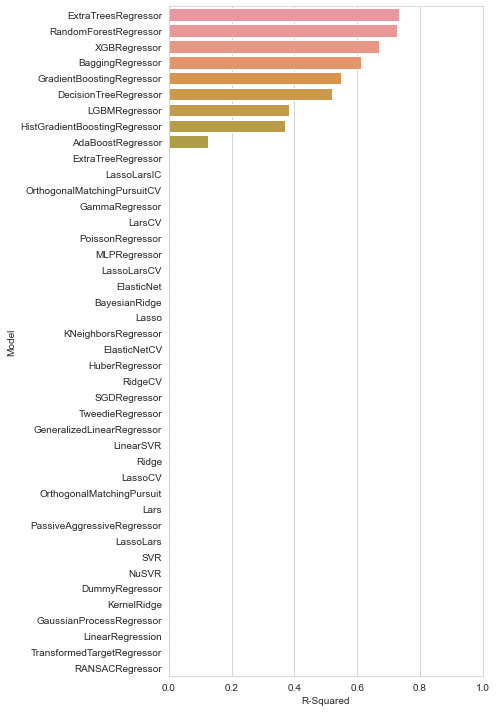

In [127]:
plt.figure(figsize=(7, 10), tight_layout=True)
sns.set_style(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="R-Squared", data=models_train)
ax.set(xlim=(0, 1))
plt.savefig('output/LazyPredict.png')

With this in mind, I'll build an ExtraTreesRegressor, an XGBRegressor, and a BaggingRegressor to round out the top five models. These will make up the ensemble model

## Extra Trees

In [97]:
from sklearn.ensemble import ExtraTreesRegressor

In [98]:
for d in range(10,20):
    extree = ExtraTreesRegressor(max_depth=d, random_state=42)
    extree.fit(X_train, y_train)
    y_pred = extree.predict(X_test)
    score = extree.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'max_depth: {d}')
    print(f'score: {score}')
    print(f'mse: {mse}')
    print('='*25)

max_depth: 10
score: 0.886843225097085
mse: 93.35831131345324
max_depth: 11
score: 0.8916815617288534
mse: 89.36651375740354
max_depth: 12
score: 0.8707401642435989
mse: 106.64390176571793
max_depth: 13
score: 0.8804767203186756
mse: 98.61090123209728
max_depth: 14
score: 0.8853697000065667
mse: 94.57402123667099
max_depth: 15
score: 0.8915521553201263
mse: 89.47327858701505
max_depth: 16
score: 0.8881428692084056
mse: 92.28605930162747
max_depth: 17
score: 0.8842588712387416
mse: 95.49049396233438
max_depth: 18
score: 0.8883509358891942
mse: 92.11439698643962
max_depth: 19
score: 0.8911610057873814
mse: 89.79599068162393


In [99]:
best_et_model = ExtraTreesRegressor(max_depth=17, random_state=42)

## XGBoost

In [100]:
from xgboost import XGBRegressor

In [101]:
for d in range(5,30):
    xgb_reg = XGBRegressor(max_depth=d, random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_test)
    score = xgb_reg.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'max_depth: {d}')
    print(f'score: {score}')
    print(f'mse: {mse}')
    print('='*25)

max_depth: 5
score: 0.8085069998921259
mse: 157.98844685840814
max_depth: 6
score: 0.8686080372314011
mse: 108.40298139250444
max_depth: 7
score: 0.8573549317502557
mse: 117.68718841990743
max_depth: 8
score: 0.8708779094853184
mse: 106.53025710617875
max_depth: 9
score: 0.8702152719305984
mse: 107.07695634866425
max_depth: 10
score: 0.8632620506780156
mse: 112.81360795336835
max_depth: 11
score: 0.8585322064815903
mse: 116.7158954419686
max_depth: 12
score: 0.8763885696109054
mse: 101.98376906789227
max_depth: 13
score: 0.8655884038334614
mse: 110.8942849406944
max_depth: 14
score: 0.8801413100189037
mse: 98.88762650295014
max_depth: 15
score: 0.8803044715886907
mse: 98.75301248059371
max_depth: 16
score: 0.8800683578563145
mse: 98.94781459784623
max_depth: 17
score: 0.8813970473154489
mse: 97.85159915452707
max_depth: 18
score: 0.878448299997223
mse: 100.28441919871656
max_depth: 19
score: 0.8805042387314965
mse: 98.58819757557129
max_depth: 20
score: 0.8822320030263098
mse: 97.16273

In [102]:
best_xgb_model = XGBRegressor(max_depth=10, random_state=42)

## Bagging

In [103]:
from sklearn.ensemble import BaggingRegressor

In [104]:
for e in range(5,50):
    bag_reg = BaggingRegressor(n_estimators=e, random_state=20)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    score = bag_reg.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'max_depth: {e}')
    print(f'score: {score}')
    print(f'mse: {mse}')
    print('='*25)

max_depth: 5
score: 0.8340041163670051
mse: 136.95243076923077
max_depth: 6
score: 0.8312249311531561
mse: 139.24535612535612
max_depth: 7
score: 0.8248771559839989
mse: 144.48249345892205
max_depth: 8
score: 0.8663545645197939
mse: 110.26217548076922
max_depth: 9
score: 0.8747707219543284
mse: 103.31855017410571
max_depth: 10
score: 0.8738537044613541
mse: 104.07512179487179
max_depth: 11
score: 0.8792266493569011
mse: 99.64225365543548
max_depth: 12
score: 0.8827614556904062
mse: 96.72591435185184
max_depth: 13
score: 0.8878709795812288
mse: 92.51037778789257
max_depth: 14
score: 0.889548410519196
mse: 91.12643838304551
max_depth: 15
score: 0.8915238066481751
mse: 89.49666723646725
max_depth: 16
score: 0.8851594747615593
mse: 94.74746444310897
max_depth: 17
score: 0.8785534518282441
mse: 100.19766524709429
max_depth: 18
score: 0.8844944307489606
mse: 95.29614909781577
max_depth: 19
score: 0.8890394063539231
mse: 91.54638468641235
max_depth: 20
score: 0.8882160856041198
mse: 92.225653

In [105]:
best_bag_model = BaggingRegressor(n_estimators=15, random_state=20)

# Model Saving

In [106]:
import joblib

### Current Models (only training post-split set)

In [107]:
# Random Forest
best_rf_model_train = best_rf_model.fit(X_train,y_train)
joblib.dump(best_rf_model_train, 'models/rf_model_train.pkl')

['models/rf_model_train.pkl']

In [108]:
# Extra Trees
best_et_model_train = best_et_model.fit(X_train,y_train)
joblib.dump(best_et_model_train, 'models/et_model_train.pkl')

['models/et_model_train.pkl']

In [109]:
# XGBoost
best_xgb_model_train = best_xgb_model.fit(X_train,y_train)
joblib.dump(best_xgb_model_train, 'models/xgb_model_train.pkl')

['models/xgb_model_train.pkl']

In [110]:
# Bagging
best_bag_model_train = best_bag_model.fit(X_train,y_train)
joblib.dump(best_bag_model_train, 'models/bag_model_train.pkl')

['models/bag_model_train.pkl']

In [111]:
# Decision Tree
best_dt_model_train = best_dt_model.fit(X_train,y_train)
joblib.dump(best_dt_model_train, 'models/dt_model_train.pkl')

['models/dt_model_train.pkl']

### Create same models with all X,y as the training set

In [112]:
# Random Forest
best_rf_model_all = best_rf_model.fit(X,y)
joblib.dump(best_rf_model_all, 'models/rf_model.pkl')

['models/rf_model.pkl']

In [113]:
# Extra Trees
best_et_model_all = best_et_model.fit(X,y)
joblib.dump(best_et_model_all, 'models/et_model.pkl')

['models/et_model.pkl']

In [114]:
# XGBoost
best_xgb_model_all = best_xgb_model.fit(X,y)
joblib.dump(best_xgb_model_all, 'models/xgb_model.pkl')

['models/xgb_model.pkl']

In [115]:
# Bagging
best_bag_model_all = best_bag_model.fit(X,y)
joblib.dump(best_bag_model_all, 'models/bag_model.pkl')

['models/bag_model.pkl']

In [116]:
# Decision Tree
best_dt_model_all = best_dt_model.fit(X,y)
joblib.dump(best_dt_model_all, 'models/dt_model.pkl')

['models/dt_model.pkl']

## Model Accuracy

In [128]:
def get_reg(model, suptitle):
    fig,axes = plt.subplots(1,3,figsize=(21,6),tight_layout=False)
    fig.suptitle(suptitle)
    scores = []
    
    axes[0].set_title("Complete Dataset")
    all_pred = model.predict(X)
    scores.append(model.score(X, y))
    sns.regplot(y, all_pred, ax=axes[0])
    
    axes[1].set_title("Test")
    test_pred = model.predict(X_test)
    scores.append(model.score(X_test, y_test))
    sns.regplot(y_test, test_pred, ax=axes[1])
    
    axes[2].set_title("Train")
    train_pred = model.predict(X_train)
    scores.append(model.score(X_train, y_train))
    sns.regplot(y_train, train_pred, ax=axes[2])


    lims = (0,320)
    for ax,score in zip(axes, scores):
        ax.set_xlabel("Actual Earnings ($ million)")
        ax.set_ylabel("Predicted Earnings ($ million)")
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.text(125, 75, f'r\u00b2 = {round(score,2)}', horizontalalignment='left', size='x-large', color='red')
    plt.savefig(f"output/{suptitle} Accuracy.png")
    plt.show()

In [140]:
plt.rcParams.update({'font.size': 16})

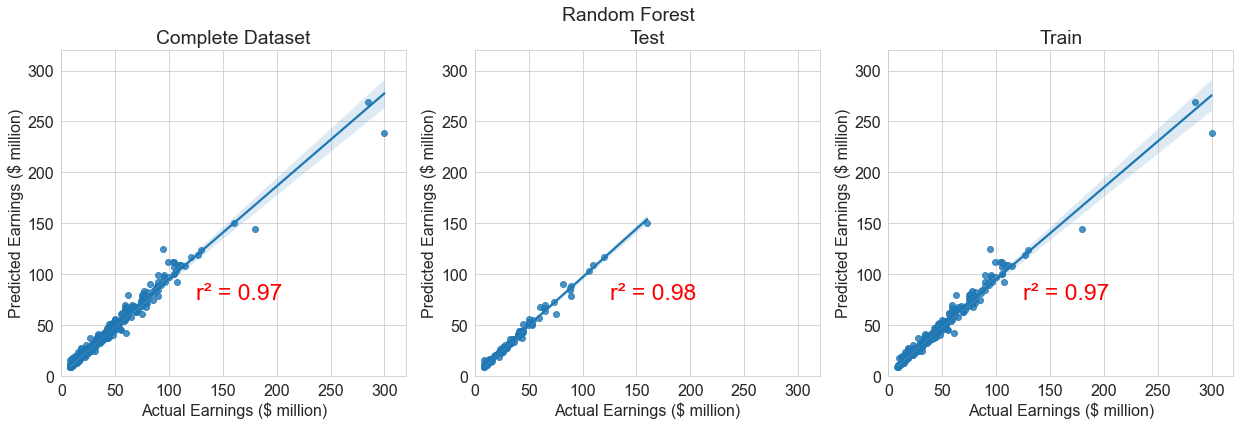

In [141]:
get_reg(best_rf_model_train, "Random Forest")

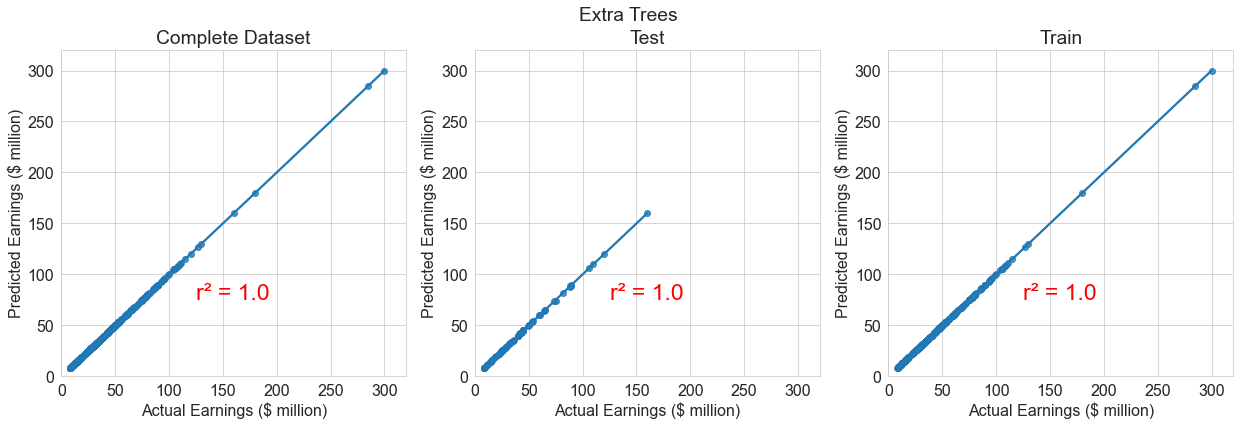

In [142]:
get_reg(best_et_model_train, "Extra Trees")

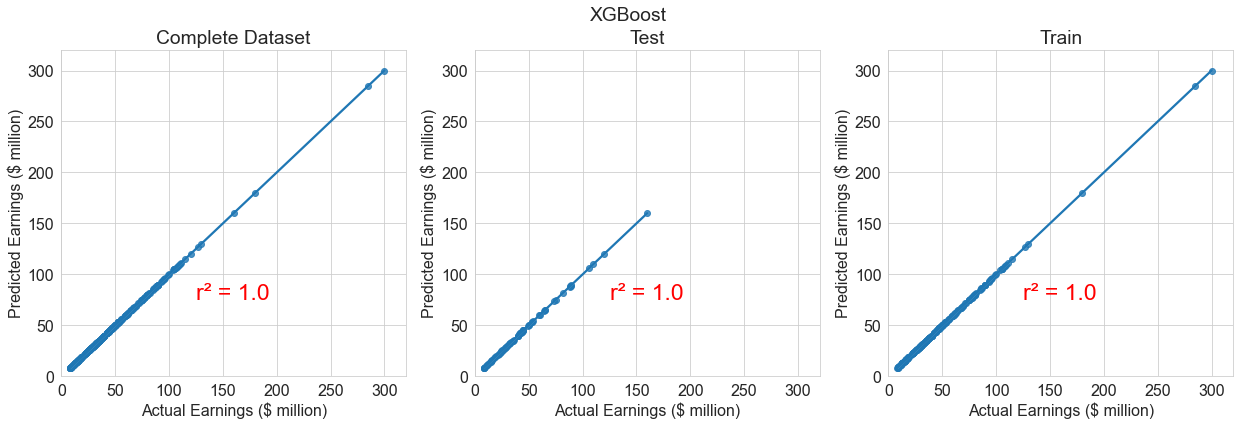

In [143]:
get_reg(best_xgb_model_train, "XGBoost")

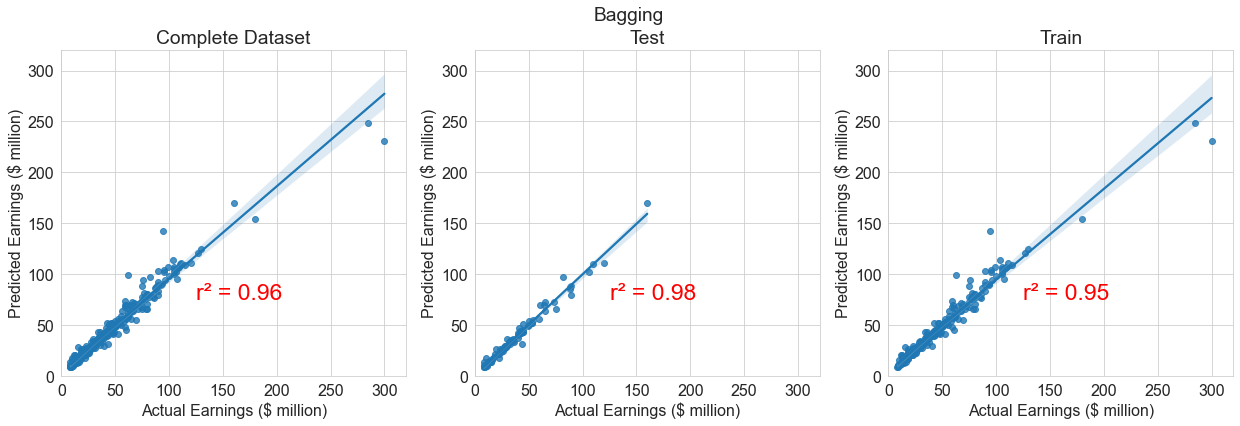

In [144]:
get_reg(best_bag_model_train, "Bagging")

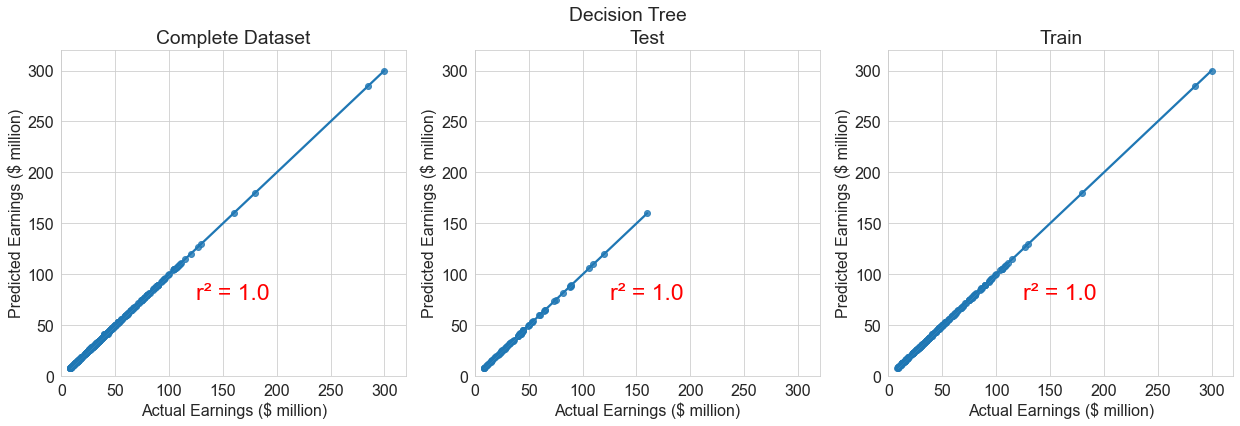

In [145]:
get_reg(best_dt_model_train, "Decision Tree")